# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Цели исследования:**
- подготовить данные к анализу;
- изучить время продажи квартир;
- определить факторы, значительно влияющие на стоимость квартир;
- проанализировать населённые пункты с наибольшим числом объявлений;
- описать зависимость стоимости квартир от расстояния до центра города в Санкт-Петербурге.

## Откроем файл с данными и изучим общую информацию 

In [1]:
#откроем файл с данными и выведем на экран первые 10 строк таблицы
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#посчитаем количество объявлений в исходной таблице
data_initial_size = len(data)
data_initial_size

23699

In [3]:
#запросим все атрибуты таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#выведем точное количество пропусков в каждом толбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы видим, что исходная таблица содержит 23699 объявлений и 22 параметра с характеристиками. В набор данных входят 4 типа данных: строки, целые числа, вещественные числа и булев тип данных. Необходимо преобразовать: столбец days_exposition в datetime, столбцы floors_total, balcony, parks_around3000, ponds_around3000 в int, столбец is_apartment в bool. Также обращаем внимание на значительное количество пропущенных значений, которые необходимо обработать на следующем этапе. Названия столбцов cityCenters_nearest, parks_around3000 и ponds_around3000 необходимо привести к змеиному регистру.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

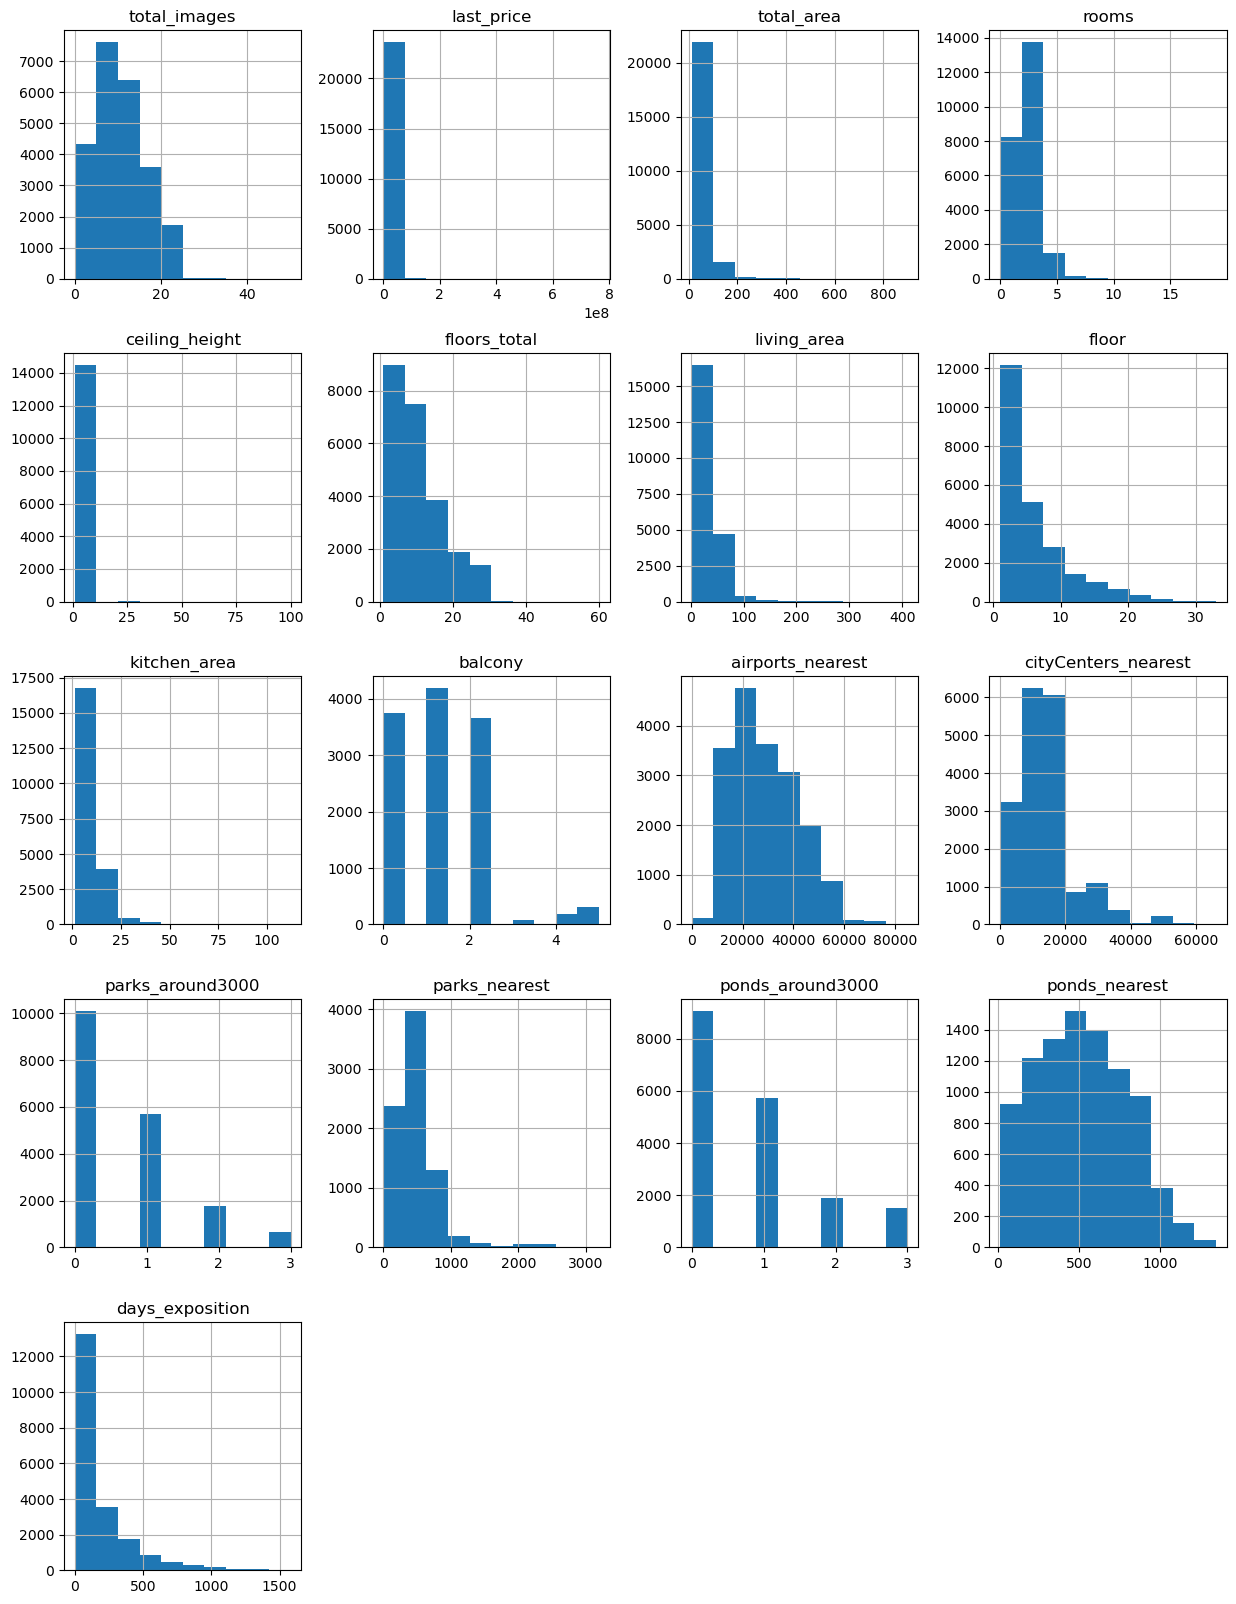

In [5]:
#построим гистограммы для большей наглядности
data.hist(figsize=(15, 20))

У некоторых графиков явно видны "хвостики" (kitchen_area, airports_nearest, parks_nearest, days_exposition), что намекает на наличие выбросов. В гистограммах по столбцам ceiling_height и last_price следует поменять количество корзин и диапазон значений, таким образом графики должны стать более нагляднее. На следующих этапах будет возможность построить гистограммы на основе новых данных после предобработки.

**Вывод:** 
Открыли файл и ознакомились с исходной таблицей. На основе полученных данных необходимо:
- преобразовать тип данных столбцов days_exposition, floors_total, balcony, parks_around3000, ponds_around3000, is_apartment;
- обработать пропущенные значения в данных;
- привести столбцы cityCenters_nearest, parks_around3000 и ponds_around3000 к змеиному регистру;
- выявить наличие дубликатов (явных и неявных);
- определить аномальные значения в данных.

## Предобработка данных

**2. 1 Приведем названия столбцов к змеиному регистру**

In [6]:
#приведем названия столбцов к змеиному регистру
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

#проверим
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В дальнейшем будем работать со столбцами city_centers_nearest, parks_around_3000, ponds_around_3000.

**2. 2 Обработаем пропуски**

In [7]:
#выведем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце **ceiling_height** 9195 пропусков, почти 40%. Вероятно, продавец просто не указал эти данные или возникла техническая ошибка. Эти данные не так важны для исследования, но пропусков много. Можно попробовать **заполнить пропуски медианным значением** столбца ceiling_height по параметру locality_name, т.к скорее всего, в одной местности расположены объекты недвижимости с одинаковой высотой потолков.

В столбце **floors_total** 86 пропусков, совсем немного. Продавец либо не указал данные, либо опять же возникла техническая ошибка. **Пропуски можно оставить.**

В столбце **living_area 1903** пропуска. Возможно, данные не были указаны из-за недостатка информации или не сохранились по технической причине. Для начала найдем соотношение медианной общей площади к медианной жилой по параметру locality_name. После попробуем **заполнить пропуски** в столбце living_area отношением общей площади к найденному соотношению.

В столбце **is_apartment** самое большое количество пропусков - 20924. Вероятно, если квартира не является апартаментами, то данный параметр просто не заполняли. **Есть смысл заполнить пропуски на 'False'.**

В столбце **kitchen_area 2278** пропусков. Возможно, продавец также не указывал данный параметр из-за нехватки информации. Можно предположить, что отсутствуют значения в том случае, если квартира является студией, или в квартире свободная планировка. Нужно проверить данную гипотезу. Как и в случае с living_area, **заполним пропуски** отношением общей площади к соотношению (медианная общая площадь к медианной площади кухни по параметру locality_name).

В столбце **balcony** 11519 пропусков. Можно предположить, что если балкон отсутсвует в квартире, то его наличие просто не указывают в объявлении. **Заменим пропуски на 0.**

В столбце **locality_name** 49 пропусков. Предположительно, данный параметр просто не был указан продавцом или система не смогла распознать местоположение квартиры по введенным геоданным. Пропусков совсем немного, на результат исследования они не повлияют. **Можем удалить строки с пропусками.**

Далее идут картографические показатели. Вероятно, пропуски в столбцах **airports_nearest (5542), city_centers_nearest (5519), parks_around_3000 (5518), parks_nearest (15620), ponds_around_3000 (5518), ponds_nearest (14589)** обусловлены тем, что возникла ошибка при получении картографических данных. Пропущенные значения в данных столбцах не должны повлиять на результат исследования. **Пропуски оставим.**

Что касается столбца **days_exposition**, он содержит 3181 пропуск. Наиболее возможный вариант пропусков - техническая ошибка в системе, так как этот параметр должен формироваться автоматически. Какими данными заполнить пропуски, мы не знаем. Вероятно, данные объявления висели на сайте меньше суток, а может, слишком долго. **Пропуски оставим**, так как удаление строк с пропущенными значениями может привести к некорректному результату исследования.

In [8]:
#заменим пропуски в столбце ceiling_height на медианные значения по локациям
for location in data['locality_name'].unique():
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == location), 'ceiling_height']=\
    data.loc[(data['locality_name'] == location), 'ceiling_height'].median()

#проверим количество пропусков
data['ceiling_height'].isna().sum()

156

In [9]:
#создадим переменные с медианными значениями
total_area_median = data.groupby('locality_name')['total_area'].median()
living_area_median = data.groupby('locality_name')['living_area'].median()

#найдем соотношение медианной общей площади к медианной жилой
living_area_ratio = total_area_median / living_area_median

#заполним пропуски в столбце living_area отношением общей площади к найденному соотношению
for location in living_area_ratio.index:
    data.loc[((data['locality_name'] == location) & (data['living_area'].isna())), 'living_area'] = data.loc[:, 'total_area'] / living_area_ratio[location]
    
#проверим количество пропусков
data['living_area'].isna().sum()

22

In [10]:
#заполним пропуски в столбцах is_apartment и balcony
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0) 

#удалим строки с пропущенными значениями в столбце locality_name
data = data.dropna(subset=['locality_name'])

#проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23529 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23633 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest      18

In [11]:
#проверим гипотезу, что если в квартире свободная планировка, или квартира-студия, то не указывается площадь кухни
print(data[data['studio'] == True]['kitchen_area'].value_counts())
print(data[data['studio'] == True]['kitchen_area'].shape[0])

print(data[data['open_plan'] == True]['kitchen_area'].value_counts())
print(data[data['open_plan'] == True]['kitchen_area'].shape[0])

Series([], Name: count, dtype: int64)
149
Series([], Name: count, dtype: int64)
67


In [12]:
#создадим переменные с медианными значениями
total_area_median = data.groupby('locality_name')['total_area'].median()
kitchen_area_median = data.groupby('locality_name')['kitchen_area'].median()

#найдем соотношение медианной общей площади к медианной площади кухни
kitchen_area_ratio = total_area_median / kitchen_area_median

#заполним пропуски в столбце kitchen_area отношением общей площади к найденному соотношению
for location in kitchen_area_ratio.index:
    data.loc[((data['locality_name'] == location) & (data['kitchen_area'].isna())), 'kitchen_area'] = data.loc[:, 'total_area'] / kitchen_area_ratio[location]
    
#проверим количество пропусков
data['kitchen_area'].isna().sum()

19

К сожалению, в столбце ceiling_height остался 121 пропуск. Это связано с тем, что в определенных населенных пунктах высота потолков в квартирах не указана. Пропусков теперь немного, можем их оставить.

Успешно заполнились пропуски в столбцах is_apartment и balcony.

Удалили строки с пропущенными значениями в locality_name. Теперь будем работать с 23650 объявлениями.

Убедились, что если продается квартира-студия или квартира со свободной планировкой, то в объявлении отсутствует информация о площади кухни. Таких объявлений 149 и 67 соответственно.

Заполнили пропуски в столбце living_area. Для этого было найдено соотношение медианной общей площади к медианной жилой. В результате, заполнили пропущенные значения отношением общей площади к найденному соотношению. Аналогично поступили со столбцом kitchen_area.

**2. 3 Преобразуем тип данных**

In [13]:
#столбец first_day_exposition приведем к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#столбец is_apartment приведем к булеву типу
data['is_apartment'] = data['is_apartment'].astype('bool')

#оставшиеся столбцы приведем к типу integer
data['parks_around_3000'] = data['parks_around_3000'].astype('int', errors = 'ignore')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int', errors = 'ignore')
data['floors_total'] =  data['floors_total'].astype('int', errors = 'ignore')
data['days_exposition'] = data['days_exposition'].astype('int', errors = 'ignore')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

#проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23529 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23633 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23631 non-null  float64       
 13  balcony              

Столбцы balcony, first_day_exposition, is_apartment и last_price успешно приняли новый тип данных. Типы столбцов parks_around_3000, ponds_around_3000, floors_total и days_exposition остались неизменными, предположительно, из-за наличия пропущенных значений. Удалить строки с пропусками мы не можем, значит, оставим тип float.

**2. 4 Обработаем дубликаты в столбце locality_name**

In [14]:
#проверим наличие явных дубликатов
data.duplicated().sum()

0

В таблице отсутствуют явные дубликаты.

Обработаем неявные дубликаты.

In [15]:
#посмотрим количество уникальных значений в столбце locality_name
print(data['locality_name'].nunique())

#посмотрим на сами уникальные значения
print(data['locality_name'].unique())

364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

In [16]:
#приведем все значения к нижнему регистру
data['locality_name'].str.lower()

#заменим в значениях букву 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#заменим 'городской поселок' на 'поселок городского типа'
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

#проверим количество уникальных значений
data['locality_name'].nunique()

323

До обработки в столбце locality_name было 364 уникальных значения. В ходе обработки все значения столбца были приведены к нижнему регистру, буква 'ё' была заменена на 'е', городской поселок был приравнен к поселку городского типа. Повторно проверив количество уникальных значений, мы обнаружили 323 уникальных значения. В результате был устранен 41 дубликат.

**2. 5 Рассмотрим аномальные значения**

In [17]:
#запросим дополнительные характеристики столбцов
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650,23650.000000,23529.000000,23565.000000,23633.000000,23650.000000,23631.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2017-11-10 00:03:57.463002112,2.070106,2.733949,10.675875,34.565339,5.893277,10.547587,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,2018-08-27 00:00:00,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.682278,1.089640e+07,35.661808,NaN,1.078620,1.012964,6.594823,22.356152,4.883317,6.064679,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916


In [18]:
#поделим значения на 10, превышающие 14
data.loc[data['ceiling_height'] >= 15, 'ceiling_height'] = data['ceiling_height'] / 10

#проверим
data['ceiling_height'].sort_values(ascending = False)

15061    14.00
10067    13.85
313      13.85
10069    13.85
22309    10.30
         ...  
22918      NaN
22935      NaN
23048      NaN
23354      NaN
23696      NaN
Name: ceiling_height, Length: 23650, dtype: float64

In [19]:
#отбросим значения в столбце ceiling_height, превыщающие 6 метров
data = data.query('ceiling_height < 7')

#отбросим значения в столбце floors_total, превыщающие 30 этажей
data = data.query('floors_total < 31')

#отбросим значения в столбце rooms, превышающие 10 комнат 
data = data.query('rooms < 11')

#проверим изменения в характеристиках
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23395.000000,2.339500e+04,23395.000000,23395,23395.000000,23395.000000,23395.000000,23390.000000,23395.000000,23389.000000,23395.000000,17990.000000,18013.000000,18014.000000,8019.000000,18014.000000,8995.000000,20258.000000
mean,9.883266,6.539842e+06,60.279003,2017-11-10 02:38:07.565719296,2.068134,2.703551,10.675529,34.543686,5.878778,10.540686,0.594101,28812.386159,14180.549437,0.612468,490.474124,0.765460,519.907393,180.904680
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18551.000000,9238.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26770.500000,13089.000000,0.000000,455.000000,0.000000,504.000000,95.000000
75%,14.000000,6.800000e+06,69.850000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37292.500000,16268.000000,1.000000,612.000000,1.000000,732.000000,231.750000
max,50.000000,7.630000e+08,631.200000,2019-05-03 00:00:00,10.000000,6.000000,29.000000,359.096364,27.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.683482,1.059263e+07,34.976097,NaN,1.056565,0.227099,6.526637,22.012705,4.847156,6.007787,0.961239,12634.890987,8610.057879,0.802332,341.736452,0.934782,277.358224,219.900353


В столбце ceiling_height присутствовали двухзначные значения. Предположительно, что это вещественные значения. Поэтому высота потолков от 15 метров была поделена на 10. Также избавились от выбивающихся значений в столбцах rooms (оставили до 10 комнат) и floors_total (оставили до 30 этажей).

Также необходимо проверить, какая доля данных от исходной таблицы осталась после предобработки.

In [20]:
#посчитаем долю оставшихся данных после предобработки
print(len(data) / data_initial_size * 100)

#посмотрим, сколько объявлений было удалено
print(data_initial_size - len(data))

98.71724545339465
304


**Вывод:** На этапе предобработки данных:
- названия столбцов cityCenters_nearest, parks_around3000 и ponds_around3000 приведены к змеиному регистру;
- заполнены пропуски в столбцах is_apartment, balcony и ceiling_height, удалены 47 строк по пропущенным значениям в столбце locality_name;
- выявлено, что если продается квартира-студия или квартира со свободной планировкой, то в объявлении отсутствует информация о площади кухни;
- преобразованы типы данных в столбцах first_day_exposition, is_apartment и last_price;
- не обнаружены явные дубликаты;
- устранен 41 неявный дубликат в столбце locality_name;
- аномальные значения в столбце ceiling_height поделены на 10 и преобразованы в вещественные значения, избавили таблицу от выбивающихся значений в столбцах rooms (оставили до 10 комнат) и floors_total (оставили до 30 этажей).

В результате предобработки данных было удалено 304 объявления. Текущая таблица содержит 98% данных из исходной таблицы.

## Посчитаем и добавим в таблицу новые столбцы

In [21]:
#добавим в таблицу столбец с ценами одного квадратного метра и округлим до целого числа
data['price_per_area'] = data['last_price'] / data['total_area']
data['price_per_area'] = data['price_per_area'].round(0)

#добавим в таблицу столбец с днями недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

#добавим в таблицу столбец с месяцами публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

#добавим в таблицу столбец с годами публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

#добавим в таблицу столбец с расстоянием в км до центра города
data['city_center_distance_km'] = data['city_centers_nearest'] / 1000

#создадим функцию для присвоения типа этажа
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#добавим в таблицу столбец с типами этажа квартиры
data['floor_type'] = data.apply(floor_type, axis = 1)

#выведем новую таблицу
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_area,exposition_weekday,exposition_month,exposition_year,city_center_distance_km,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,16.028,другой
1,7,3350000,40.40,2018-12-04,1,2.63,11.0,18.600000,1,True,...,NaN,0.0,NaN,81.0,82921.0,1,12,2018,18.603,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.300000,4,True,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,13.933,другой
3,0,64900000,159.00,2015-07-24,3,2.70,14.0,90.485455,9,True,...,84.0,3.0,234.0,424.0,408176.0,4,7,2015,6.800,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,8.098,другой
5,10,2890000,30.40,2018-09-10,1,2.60,12.0,14.400000,5,True,...,NaN,NaN,NaN,55.0,95066.0,0,9,2018,NaN,другой
6,6,3700000,37.30,2017-11-02,1,2.64,26.0,10.600000,6,True,...,NaN,0.0,NaN,155.0,99196.0,3,11,2017,19.143,другой
7,5,7915000,71.60,2019-04-18,2,2.70,24.0,40.746909,22,True,...,NaN,0.0,NaN,NaN,110545.0,3,4,2019,11.634,другой
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.430000,26,True,...,NaN,NaN,NaN,189.0,87455.0,2,5,2018,NaN,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,True,...,NaN,0.0,NaN,289.0,88525.0,6,2,2017,15.008,другой


**Вывод:** В таблицу с объявлениями о продаже квартир были добавлены новые столбцы:
- получили столбец price_per_area (цена одного квадратного метра) путем деления столбца last_price на total_area;
- получили столбец exposition_weekday (день публикации объявления) путем применения метода dt.weekday к столбцу first_day_exposition;
- получили столбец exposition_month (месяц публикации объявления) путем применения метода dt.month к столбцу first_day_exposition;
- получили столбец exposition_year (год публикации объявления) путем применения метода dt.year к столбцу first_day_exposition;
- получили столбец city_center_distance_km (расстояние в км до центра города) путем деления столбца city_centers_nearest на 1000;
- получили столбец floor_type (тип этажа) путем создания собственной функции для присвоения типа этажа.

Также необходимо отметить, что если в исходных столбцах присутствовали пропуски, то в новых столбцах в данных строках пропущенные значения тоже сохранились.

## Проведем исследовательский анализ данных

**4. 1 Изучим подробнее параметры объектов**

**Общая площадь квартир**

In [22]:
#запросим дополнительные характеристики столбца total_area
data['total_area'].describe()

count    23395.000000
mean        60.279003
std         34.976097
min         12.000000
25%         40.000000
50%         52.000000
75%         69.850000
max        631.200000
Name: total_area, dtype: float64

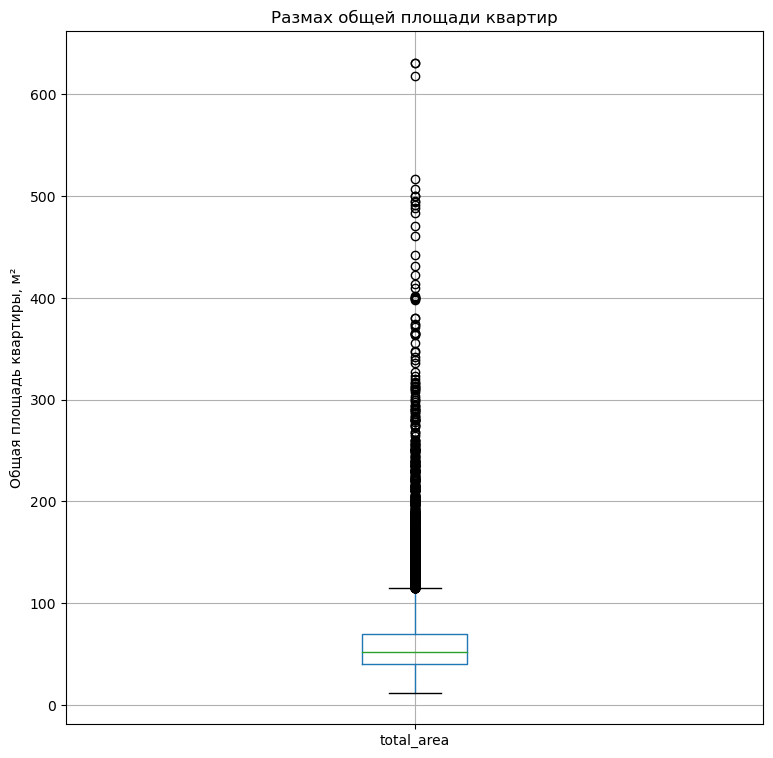

In [23]:
#построим диаграмму размаха для столбца total_area
data.boxplot(column='total_area', figsize=(9, 9))
plt.title('Размах общей площади квартир')
plt.ylabel('Общая площадь квартиры, м²')
plt.show()

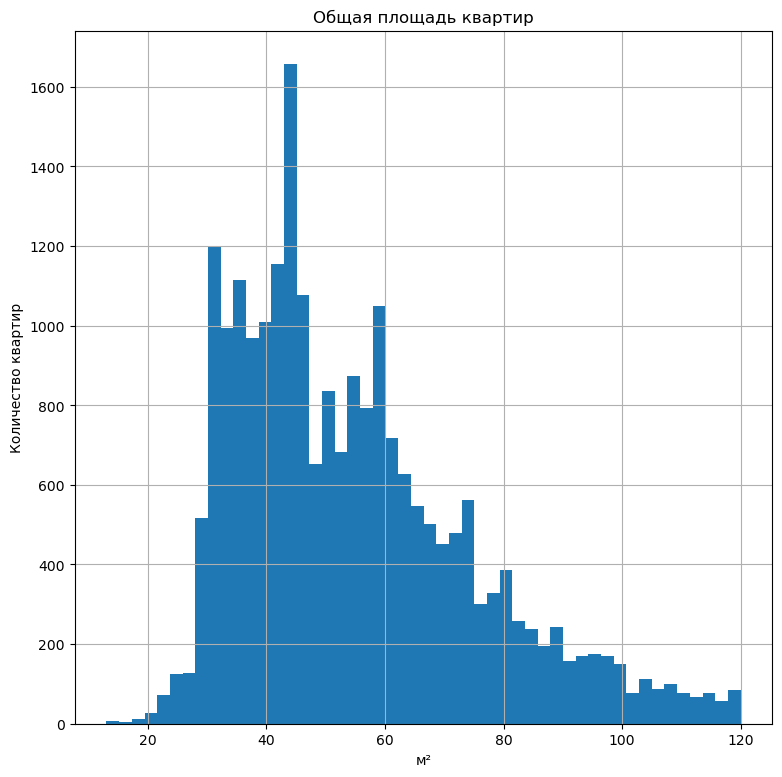

In [24]:
#построим гистограмму для столбца total_area, исключив выбросы
(
data.query('12.5 < total_area <= 120')
    .hist(column = 'total_area', figsize=(9, 9), grid = True, bins = 50)
)
plt.title('Общая площадь квартир')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что общая площадь квартир меньше 12,5 м² и больше 120 м² - это выбросы. Среднее значение в столбце total_area - 60 м², а медиана - 52 м². Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры с общей площадью 45 м². Также распространены квартиры с общей площадью 35 и 65 м². Реже всего встречаются квартиры с общей площадью меньше 22 м². 

**Жилая площадь квартир**

In [25]:
#запросим дополнительные характеристики столбца living_area
data['living_area'].describe()

count    23390.000000
mean        34.543686
std         22.012705
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        359.096364
Name: living_area, dtype: float64

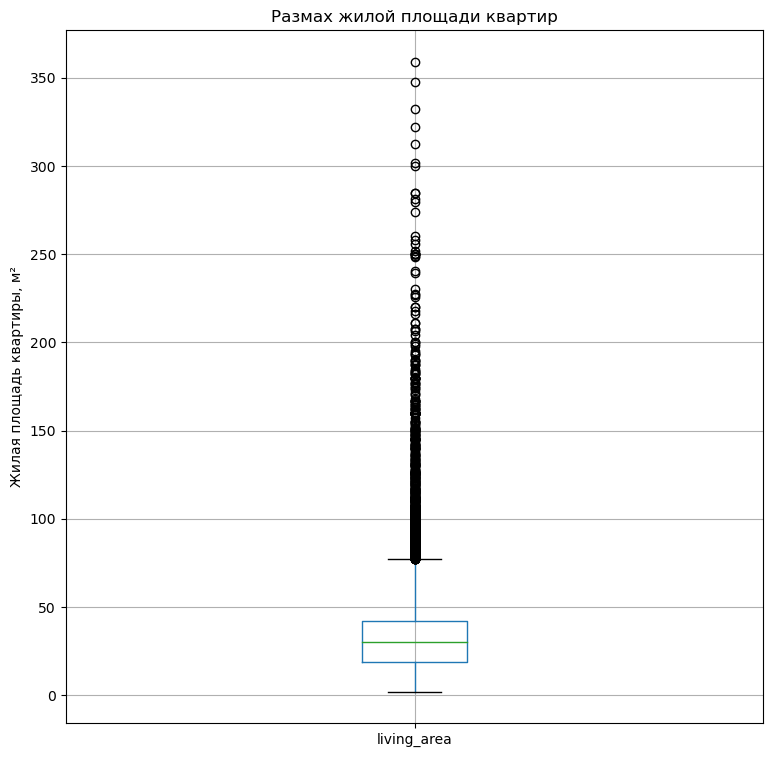

In [26]:
#построим диаграмму размаха для столбца living_area
data.boxplot(column='living_area', figsize=(9, 9))
plt.title('Размах жилой площади квартир')
plt.ylabel('Жилая площадь квартиры, м²')
plt.show()

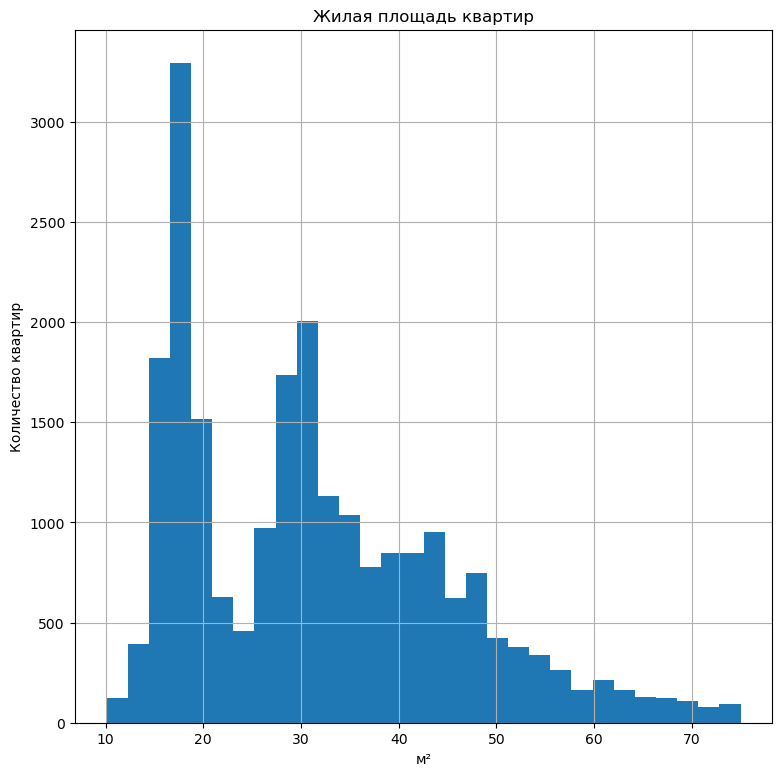

In [27]:
#построим гистограмму для столбца living_area, исключив выбросы
(
data.query('10 < living_area <= 75')
    .hist(column = 'living_area',  figsize=(9, 9), grid = True, bins = 30)
)
plt.title('Жилая площадь квартир')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что жилая площадь квартир меньше 10 м² и больше 75 м² - это выбросы. Среднее значение в столбце living_area - 34 м², а медиана - 30 м². Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры с жилой площадью 17-18 м². Также распространены квартиры с жилой площадью 29-32 м². Реже всего встречаются квартиры с жилой площадью меньше 12 и больше 70 м². 

**Площадь кухни квартир**

In [28]:
#запросим дополнительные характеристики столбца kitchen_area
data['kitchen_area'].describe()

count    23389.000000
mean        10.540686
std          6.007787
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

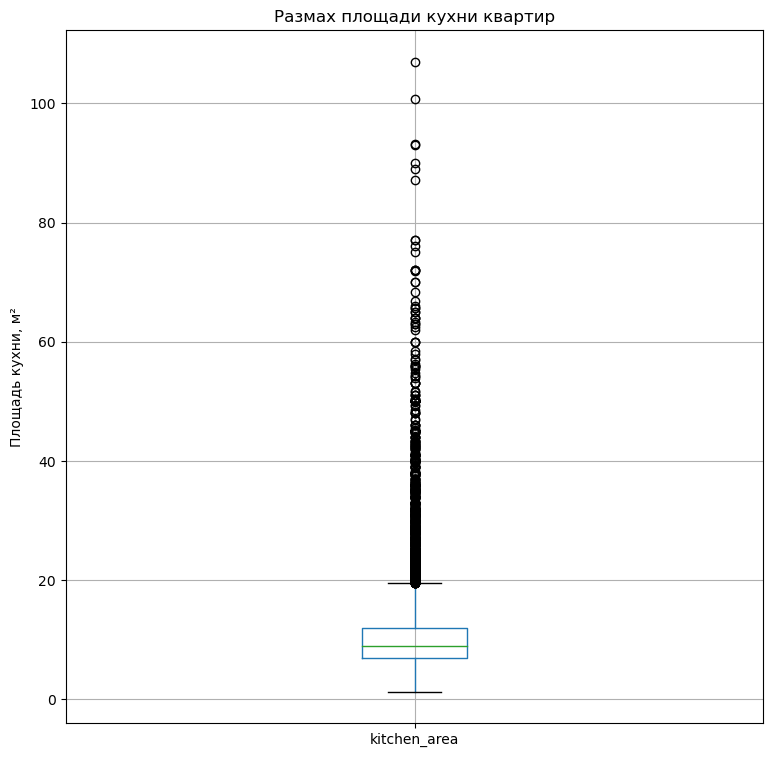

In [29]:
#построим диаграмму размаха для столбца kitchen_area
data.boxplot(column='kitchen_area', figsize=(9, 9))
plt.title('Размах площади кухни квартир')
plt.ylabel('Площадь кухни, м²')
plt.show()

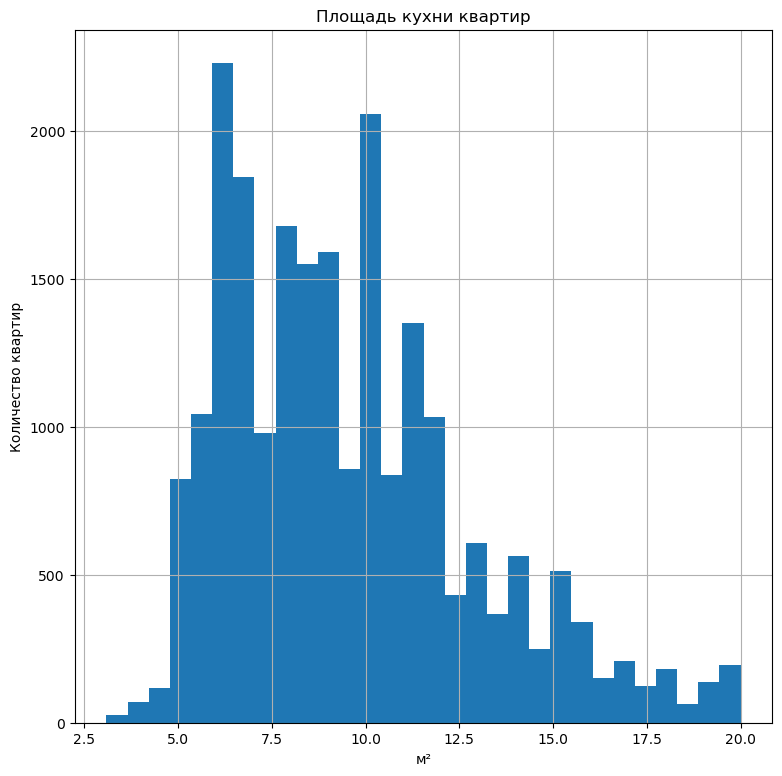

In [30]:
#построим гистограмму для столбца kitchen_area, исключив выбросы
(
data.query('3 < kitchen_area <= 20')
    .hist(column = 'kitchen_area',  figsize=(9, 9), grid = True, bins = 30)
)
plt.title('Площадь кухни квартир')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что площадь кухни квартир меньше 3 м² и больше 20 м² - это выбросы. Среднее значение в столбце kitchen_area - 10.5 м², а медиана - 9 м². Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры с площадью кухни 6-6,5 м². Также распространены квартиры с площадью кухни 10 м². Реже всего встречаются квартиры с кухонной площадью меньше 5 и больше 17,5 м². 

**Цена объекта квартиры**

In [31]:
#запросим дополнительные характеристики столбца last_price
data['last_price'].describe()

count    2.339500e+04
mean     6.539842e+06
std      1.059263e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

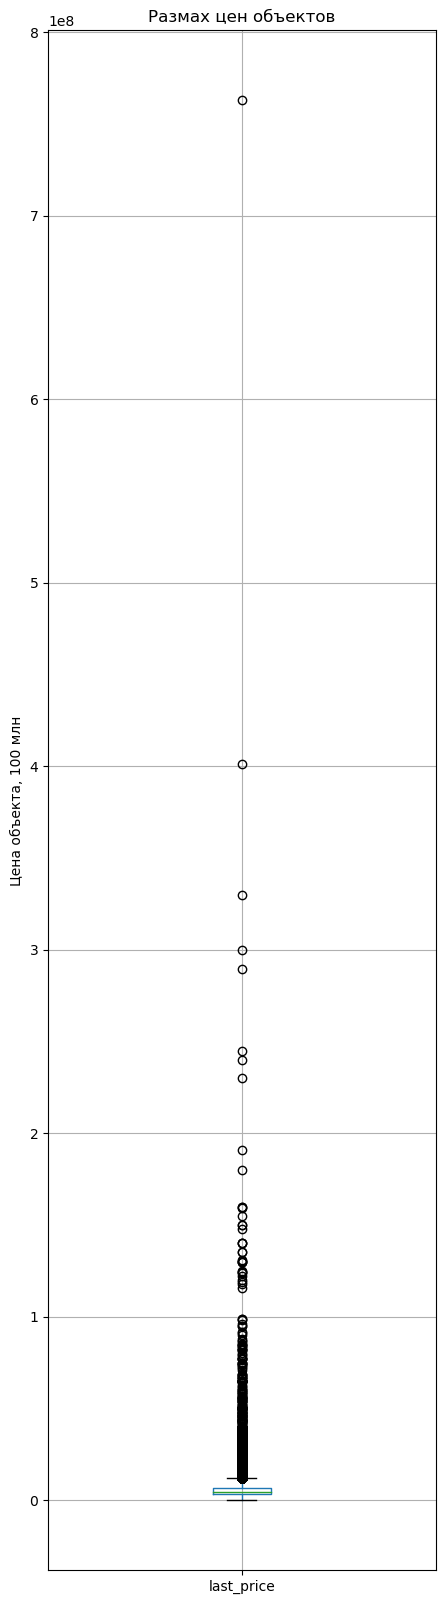

In [32]:
#построим диаграмму размаха для столбца last_price
data.boxplot(column='last_price', figsize = (5,20))
plt.title('Размах цен объектов')
plt.ylabel('Цена объекта, 100 млн')
plt.show()

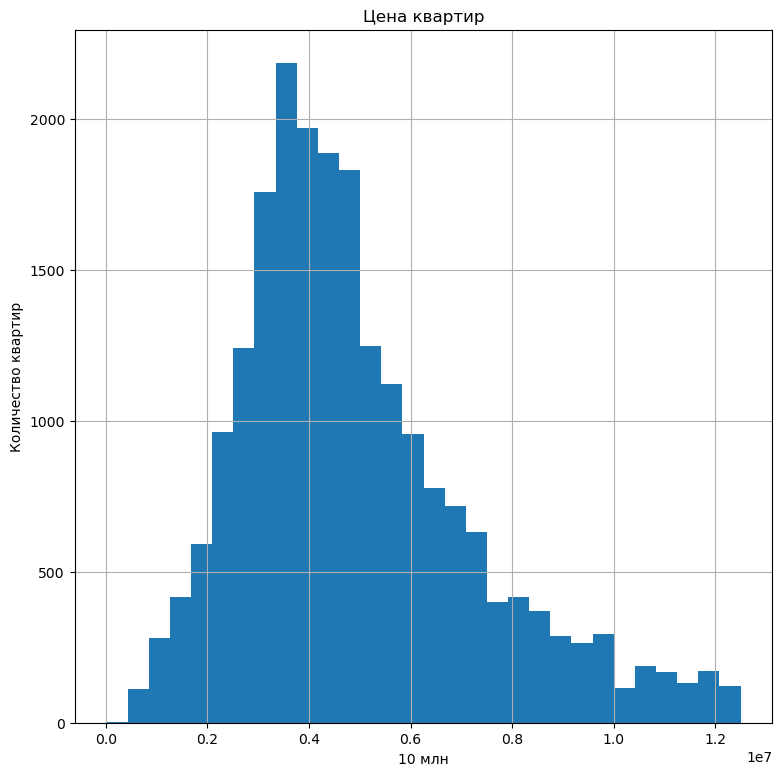

In [33]:
#построим гистограмму для столбца last_price, исключив выбросы
(
data.query('0 < last_price <= 12500000')
    .hist(column = 'last_price',  figsize=(9, 9), grid = True, bins = 30)
)
plt.title('Цена квартир')
plt.xlabel('10 млн')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что стоимость квартир больше 12,5 млн - это выбросы. Среднее значение в столбце last_price - 6,5 млн, а медиана - 4,6 млн. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры стоимостью 3-5 млн. Реже всего встречаются квартиры стоимостью меньше 1 млн и больше 10 млн.

**Количество комнат в квартире**

In [34]:
#запросим дополнительные характеристики столбца rooms
data['rooms'].describe()

count    23395.000000
mean         2.068134
std          1.056565
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

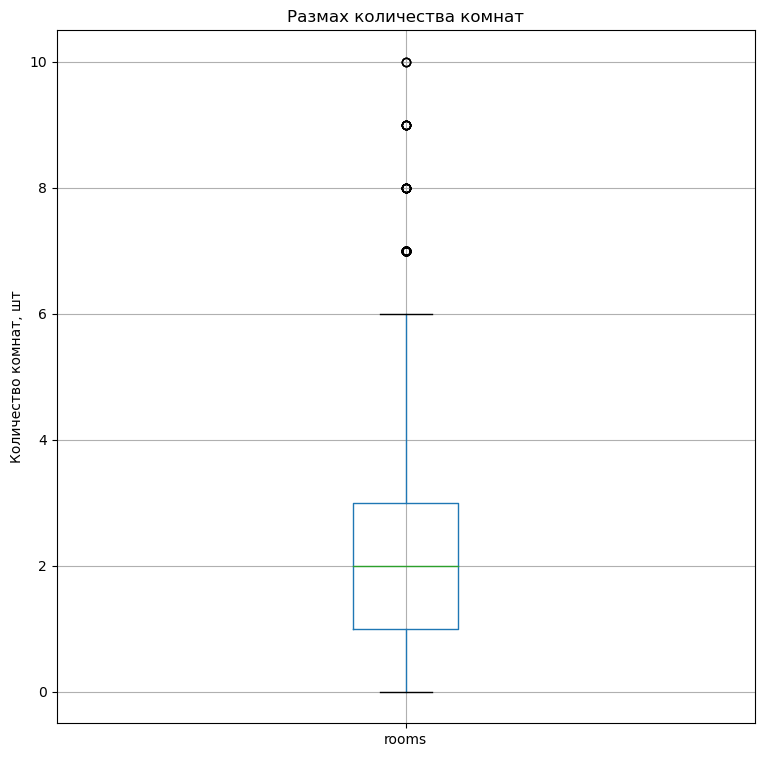

In [35]:
#построим диаграмму размаха для столбца rooms
data.boxplot(column='rooms', figsize=(9, 9))
plt.title('Размах количества комнат')
plt.ylabel('Количество комнат, шт')
plt.show()

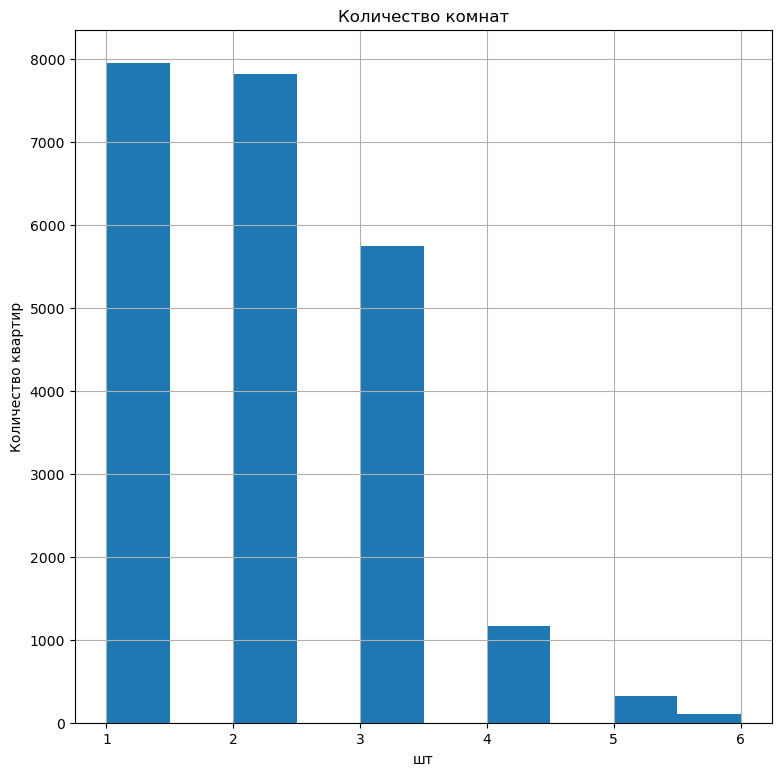

In [36]:
#построим гистограмму для столбца rooms, исключив выбросы
(
data.query('0 < rooms <= 6')
    .hist(column = 'rooms',  figsize=(9, 9), grid = True)
)
plt.title('Количество комнат')
plt.xlabel('шт')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что количество комнат в квартире больше 6 - это выбросы. Среднее значение в столбце rooms - 2 м², и медиана - 2 м². Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются однокомнатные и двухкомнатные квартиры. Реже всего встречаются квартиры с 5 и 6 комнатами.

**Высота потолков квартир**

In [37]:
#запросим дополнительные характеристики столбца ceiling_height
data['ceiling_height'].describe()

count    23395.000000
mean         2.703551
std          0.227099
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

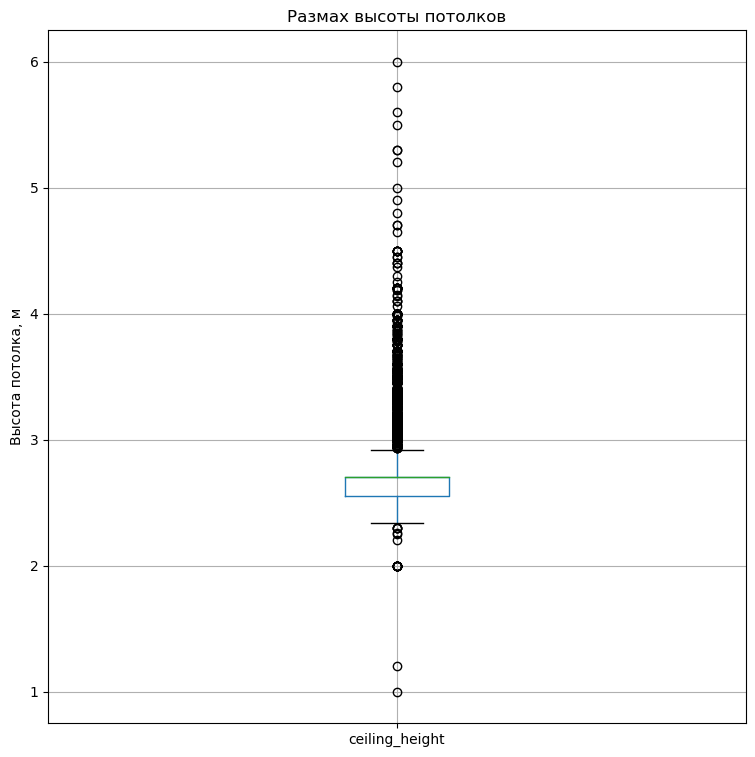

In [38]:
#построим диаграмму размаха для столбца ceiling_height
data.boxplot(column='ceiling_height', figsize=(9, 9))
plt.title('Размах высоты потолков')
plt.ylabel('Высота потолка, м')
plt.show()

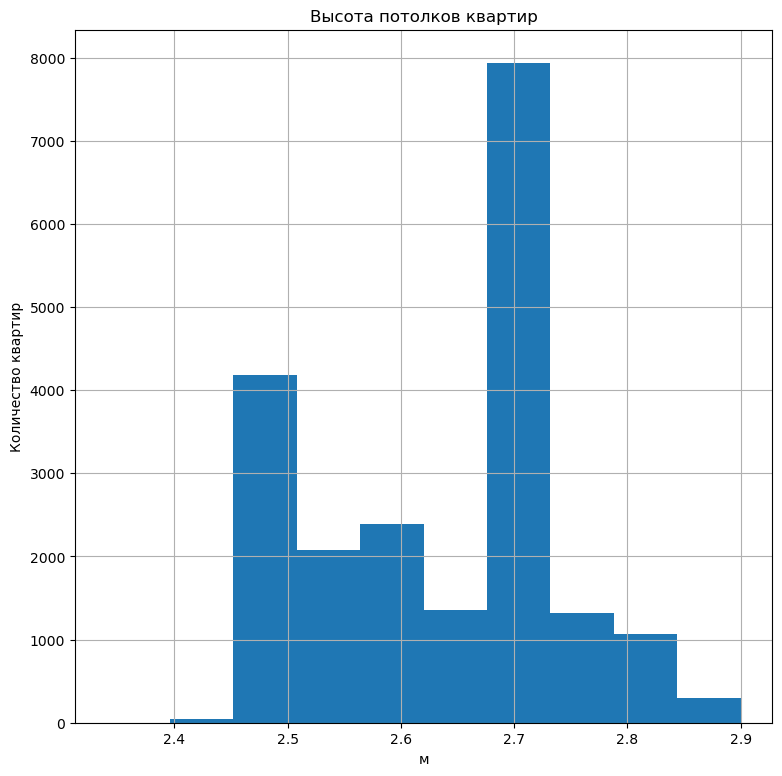

In [39]:
#построим гистограмму для столбца ceiling_height, исключив выбросы
(
data.query('2.3 < ceiling_height <= 2.9')
    .hist(column = 'ceiling_height',  figsize=(9, 9), grid = True)
)
plt.title('Высота потолков квартир')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что высота потолков в квартирах меньше 2,4 м и больше 2,9 м - это выбросы. Среднее значение в столбце ceiling_height - 2,7 м, и медиана - 2,7 м. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры с высотой потолков 2,7 м. Реже всего встречаются квартиры с кухонной площадью меньше 2,45 и больше 2,85 м.

**Этаж квартиры**

In [40]:
#запросим дополнительные характеристики столбца floor
data['floor'].describe()

count    23395.000000
mean         5.878778
std          4.847156
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

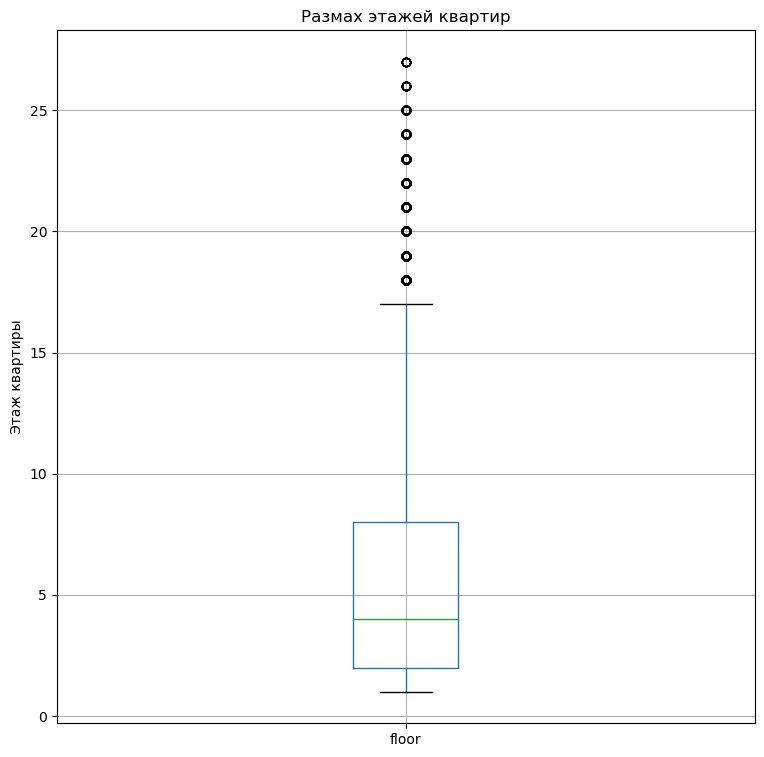

In [41]:
#построим диаграмму размаха для столбца floor
data.boxplot(column='floor', figsize=(9, 9))
plt.title('Размах этажей квартир')
plt.ylabel('Этаж квартиры')
plt.show()

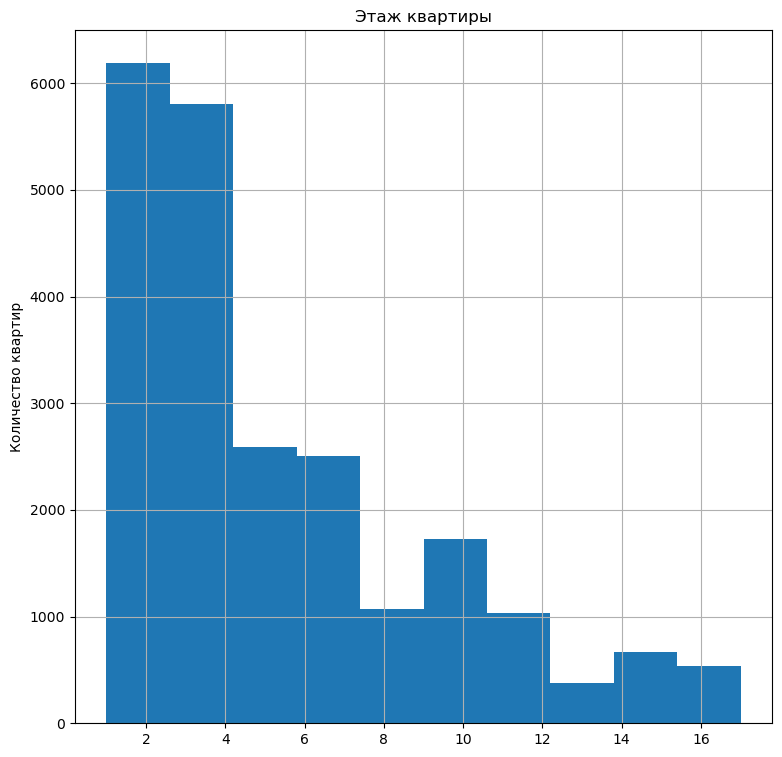

In [42]:
#построим гистограмму для столбца floor, исключив выбросы
data = data.rename(columns={'floor': 'floor_number'})

data.query('0 < floor_number < 18').hist(column='floor_number', figsize=(9, 9), grid=True)
plt.title('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

Библиотека pandas использует numexpr для оптимизации вычислений, и имя столбца floor конфликтует со встроенной функцией Python math.floor(). numexpr не может отличить имя столбца от функции, поэтому переименуем столбец floor на floor_number. Построив диаграмму размаха, определили, что квартиры, находящиеся выше 17 этажа - это выбросы. Среднее значение в столбце floor - 5 этажей, и медиана - 4 этажа. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры, находящиеся с 1 по 4 этаж. Реже всего встречаются квартиры, расположенные выше 13 этажа.

**Тип этажа квартиры («первый», «последний», «другой»)**

In [43]:
#запросим дополнительные характеристики столбца floor_type
data['floor_type'].describe()

count      23395
unique         3
top       другой
freq       17239
Name: floor_type, dtype: object

In [44]:
#рассмотрим количество квартир в каждом типе этажа
data['floor_type'].value_counts()

floor_type
другой       17239
последний     3286
первый        2870
Name: count, dtype: int64

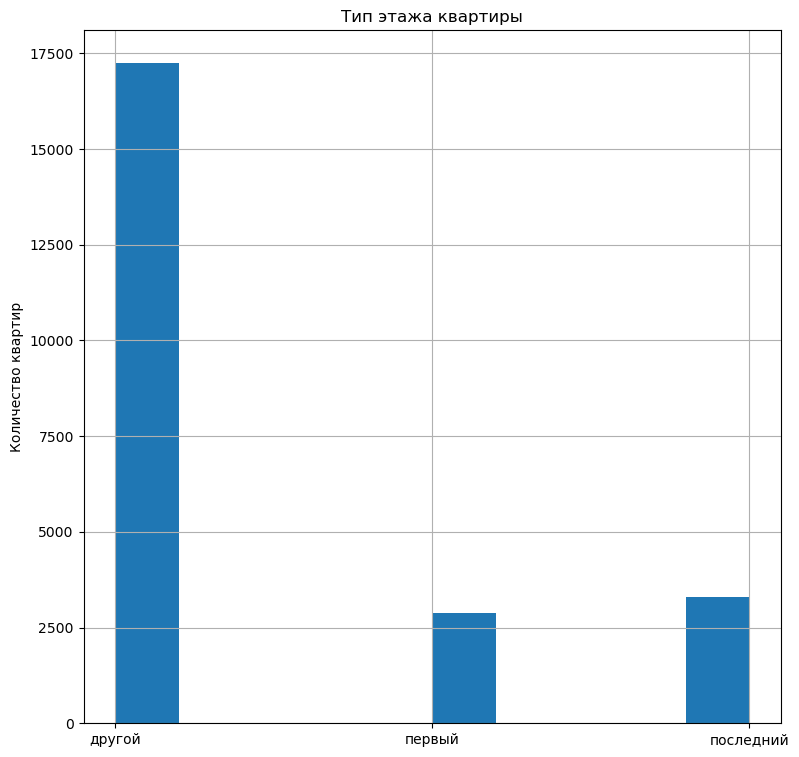

In [45]:
#построим гистограмму для столбца floor_type
data['floor_type'].hist(figsize=(9, 9), grid = True)
plt.title('Тип этажа квартиры')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме видно, что распредение квартир, расположенных на первом и последнем этажах, почти одинаковое. В объявлениях чаще всего встречаются квартиры, находящиеся между первым и последним этажами.

**Общее количество этажей в доме**

In [46]:
#запросим дополнительные характеристики столбца floors_total
data['floors_total'].describe()

count    23395.000000
mean        10.675529
std          6.526637
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

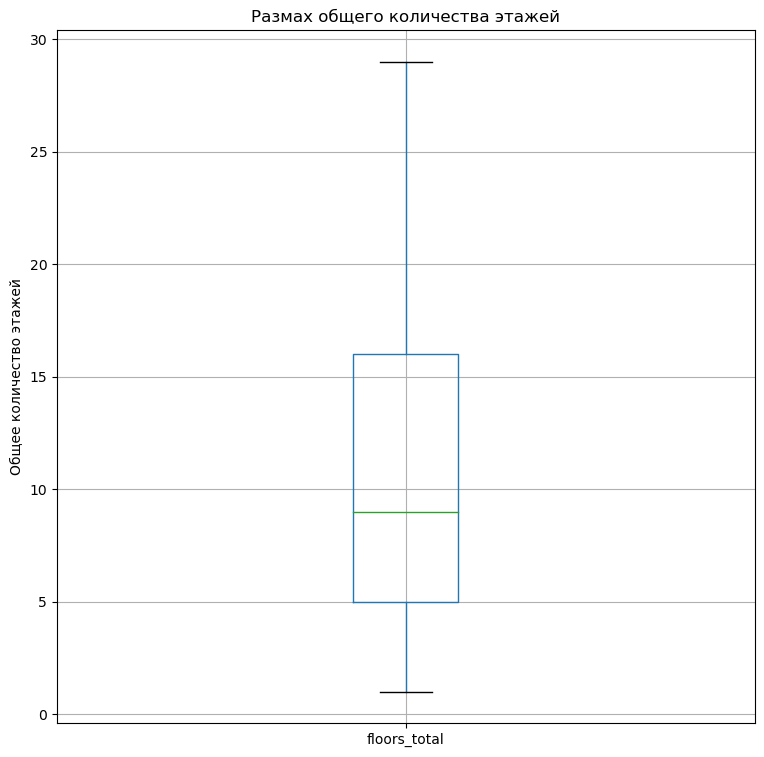

In [47]:
#построим диаграмму размаха для столбца floors_total
data.boxplot(column='floors_total', figsize=(9, 9))
plt.title('Размах общего количества этажей')
plt.ylabel('Общее количество этажей')
plt.show()

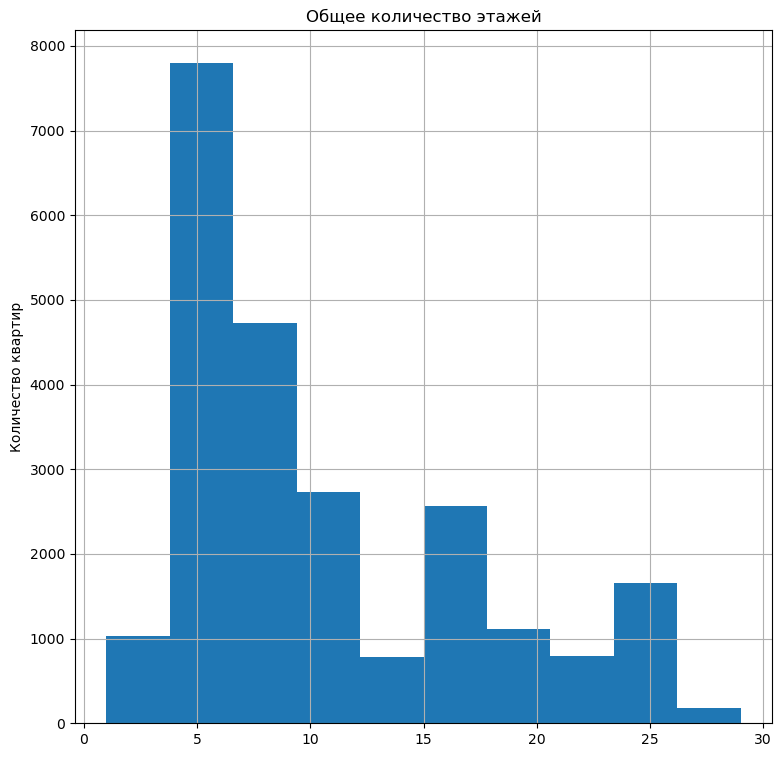

In [48]:
#построим гистограмму для столбца floors_total, исключив выбросы
(
data.query('0 < floors_total < 30')
    .hist(column = 'floors_total',  figsize=(9, 9), grid = True)
)
plt.title('Общее количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что объекты недвижимости этажностью выше 29 - это выбросы. Среднее значение в столбце floors_total - 10 этажей, и медиана - 9 этажей. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются объекты недвижимости этажностью от 4 до 6. Реже всего встречаются дома, имеющие больше 26 этажей.

**Расстояние до центра города в метрах**

In [49]:
#запросим дополнительные характеристики столбца city_centers_nearest
data['city_centers_nearest'].describe()

count    18013.000000
mean     14180.549437
std       8610.057879
min        181.000000
25%       9238.000000
50%      13089.000000
75%      16268.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

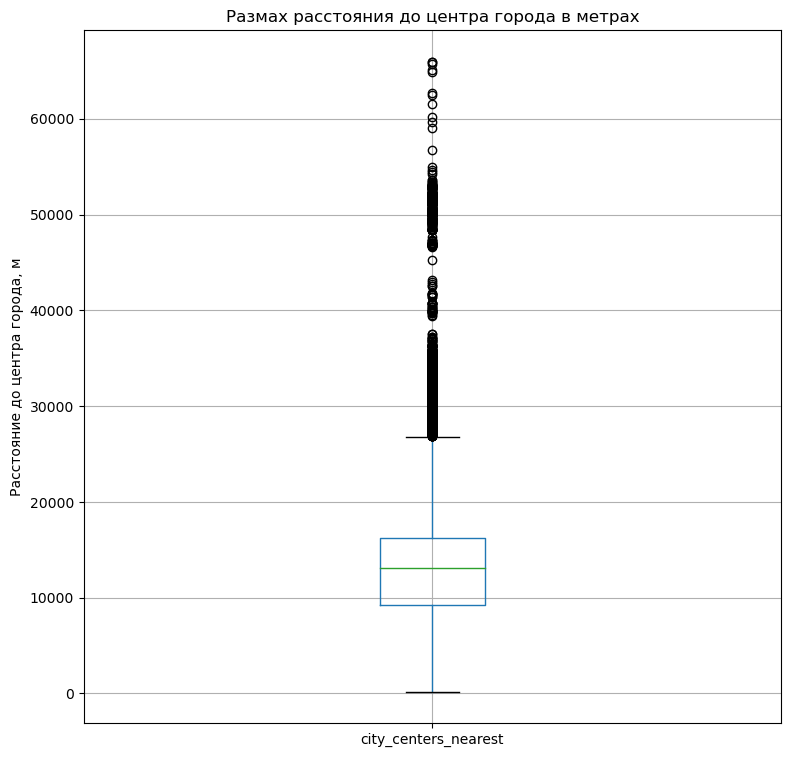

In [50]:
#построим диаграмму размаха для столбца city_centers_nearest
data.boxplot(column='city_centers_nearest', figsize=(9, 9))
plt.title('Размах расстояния до центра города в метрах')
plt.ylabel('Расстояние до центра города, м')
plt.show()

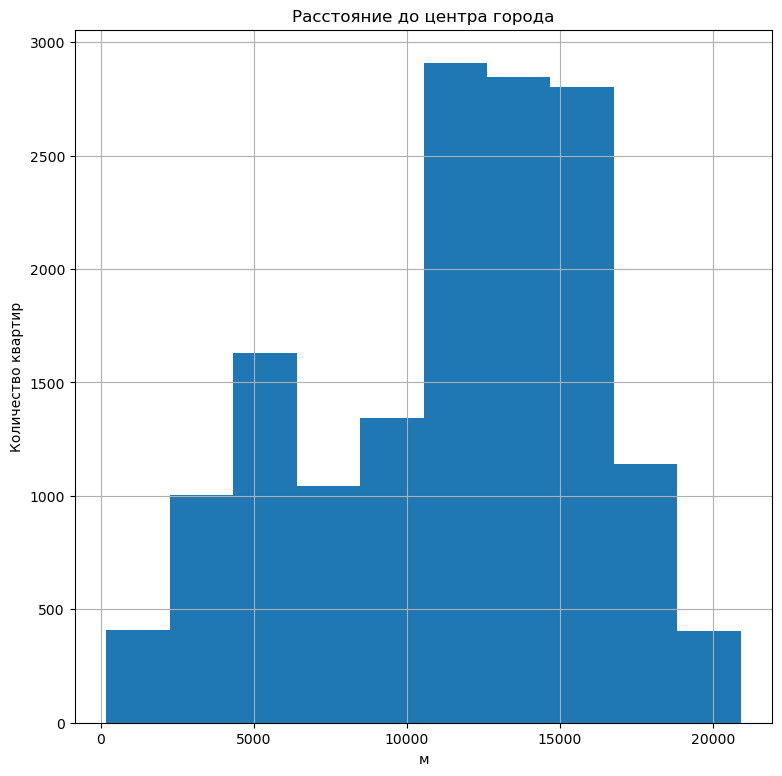

In [51]:
#построим гистограмму для столбца city_centers_nearest, исключив выбросы
(
data.query('0 < city_centers_nearest < 20900')
    .hist(column = 'city_centers_nearest',  figsize=(9, 9), grid = True)
)
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что расстояния до центра города больше 20900 м - это выбросы. Среднее значение в столбце city_centers_nearest - 14180 м, и медиана - 13089 м. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры, от которых расстояние до центра города от 11000 до 17000 м. Реже всего встречаются квартиры с расстоянием до центра города меньше 2500 м и больше 18000 м.

**Расстояние до ближайшего аэропорта**

In [52]:
#запросим дополнительные характеристики столбца airports_nearest
data['airports_nearest'].describe()

count    17990.000000
mean     28812.386159
std      12634.890987
min          0.000000
25%      18551.000000
50%      26770.500000
75%      37292.500000
max      84869.000000
Name: airports_nearest, dtype: float64

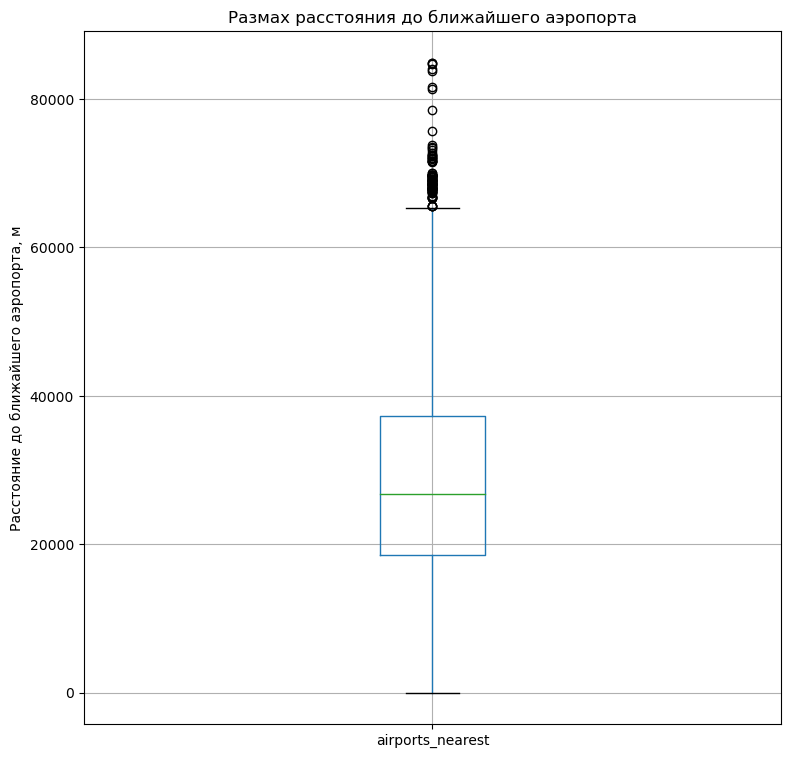

In [53]:
#построим диаграмму размаха для столбца airports_nearest
data.boxplot(column='airports_nearest', figsize=(9, 9))
plt.title('Размах расстояния до ближайшего аэропорта')
plt.ylabel('Расстояние до ближайшего аэропорта, м')
plt.show()

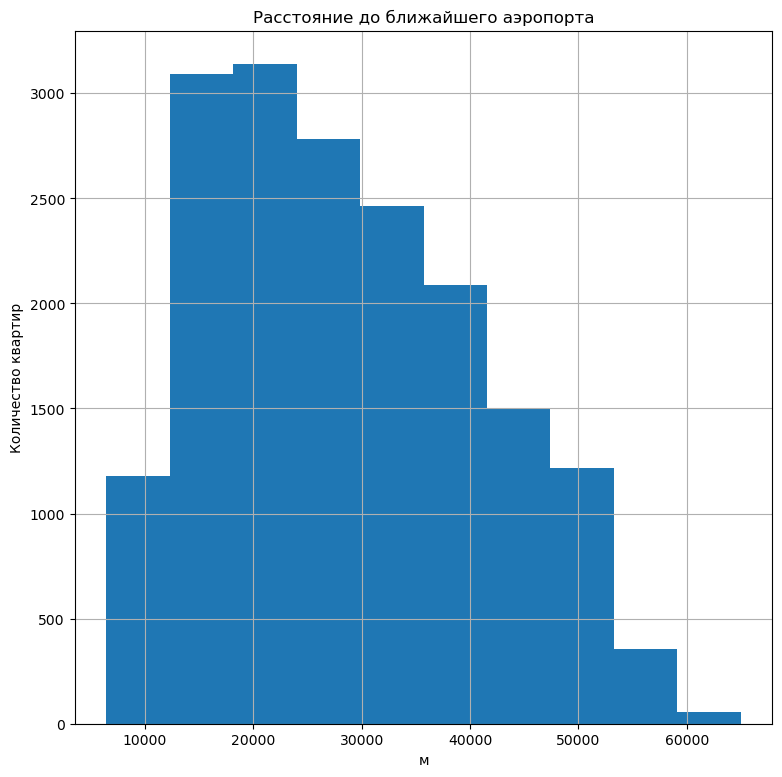

In [54]:
#построим гистограмму для столбца airports_nearest, исключив выбросы
(
data.query('0 < airports_nearest <= 65000')
    .hist(column = 'airports_nearest',  figsize=(9, 9), grid = True)
)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что расстояния до ближайшего аэропорта больше 65000 м - это выбросы. Среднее значение в столбце airports_nearest - 28812 м, и медиана - 26770 м. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры, от которых расстояние до ближайшего аэропорта от 13000 до 30000 м. Реже всего встречаются квартиры с расстоянием до ближайшего аэропорта больше 53500 м.

**Расстояние до ближайшего парка**

In [55]:
#запросим дополнительные характеристики столбца parks_nearest
data['parks_nearest'].describe()

count    8019.000000
mean      490.474124
std       341.736452
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

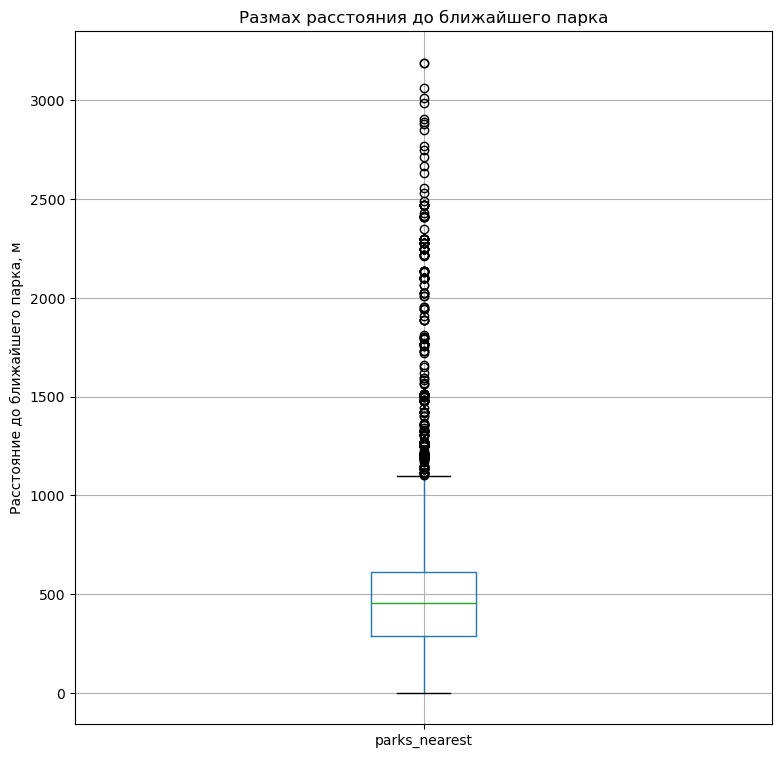

In [56]:
#построим диаграмму размаха для столбца parks_nearest
data.boxplot(column='parks_nearest', figsize=(9, 9))
plt.title('Размах расстояния до ближайшего парка')
plt.ylabel('Расстояние до ближайшего парка, м')
plt.show()

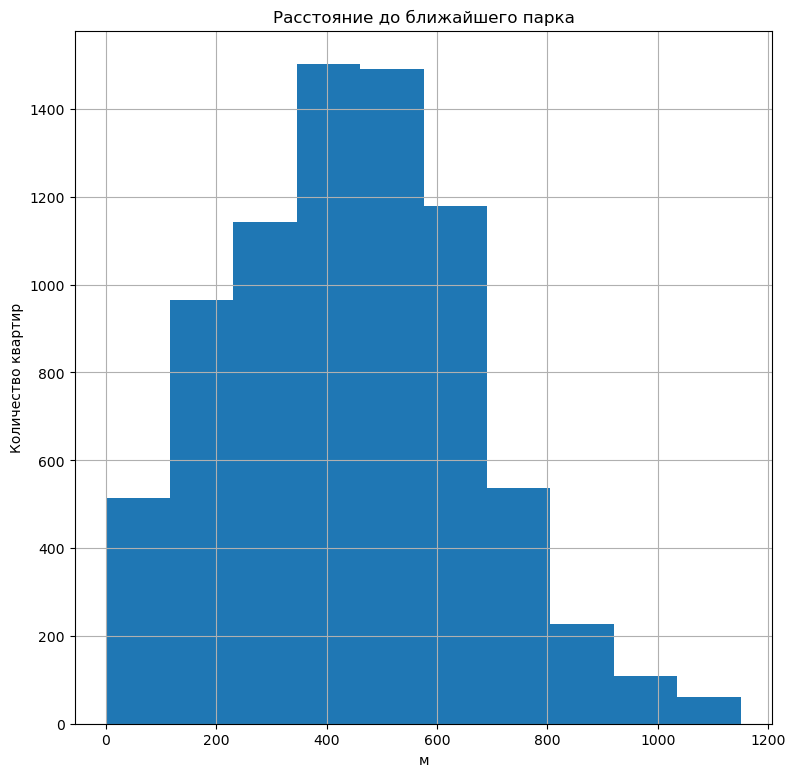

In [57]:
#построим гистограмму для столбца parks_nearest, исключив выбросы
(
data.query('0 < parks_nearest <= 1150')
    .hist(column = 'parks_nearest',  figsize=(9, 9), grid = True)
)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что расстояния до ближайшего парка больше 1150 м - это выбросы. Среднее значение в столбце parks_nearest - 490 м, и медиана - 455 м. Построили гистограмму, исключив выбросы. На графике видно, что в объявлениях чаще всего встречаются квартиры, от которых расстояние до ближайшего парка от 350 до 580 м. Реже всего встречаются квартиры с расстоянием до ближайшего парка больше 900 м.

**День публикации объявления**

In [58]:
#запросим дополнительные характеристики столбца exposition_weekday
data['exposition_weekday'].describe()

count    23395.000000
mean         2.565292
std          1.787973
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [59]:
#рассмотрим количество объявлений, опубликованных в определенные дни недели
data['exposition_weekday'].value_counts()

exposition_weekday
3    4246
1    4139
4    3947
2    3919
0    3575
5    1902
6    1667
Name: count, dtype: int64

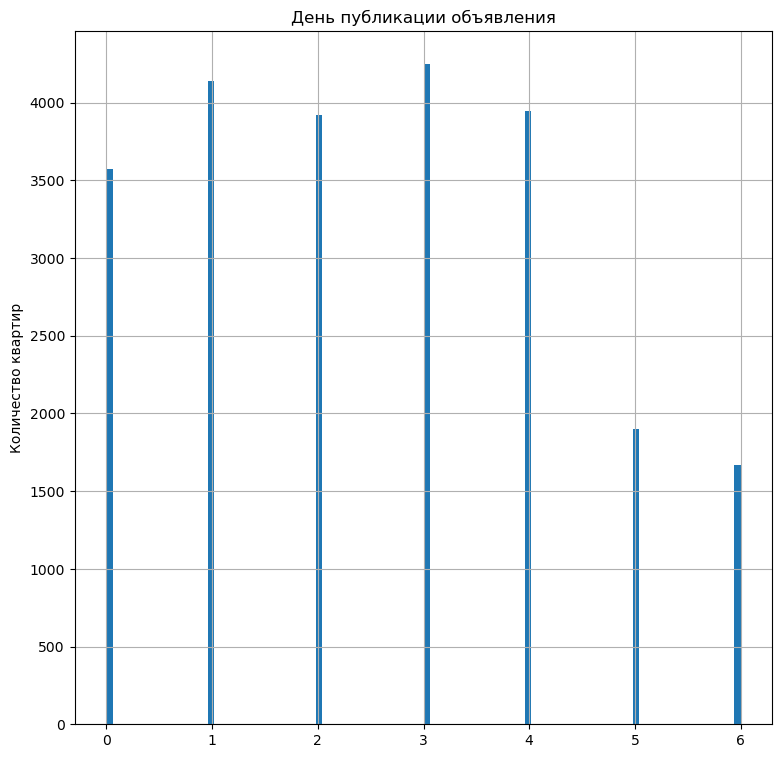

In [60]:
#построим гистограмму для столбца exposition_weekday
data['exposition_weekday'].hist(figsize=(9, 9), grid = True, bins = 100)
plt.title('День публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

Ссылаясь на гистограмму, можно сделать вывод, что чаще всего объявления о продаже квартир публиковались в будние дни недели, наиболее частый вариант - четверг. Реже всего объявления публиковались в воскресенье.

**Месяц публикации объявления**

In [61]:
#запросим дополнительные характеристики столбца exposition_month
data['exposition_month'].describe()

count    23395.000000
mean         6.401667
std          3.492885
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [62]:
#рассмотрим количество объявлений, опубликованных в определенные месяцы
data['exposition_month'].value_counts()

exposition_month
2     2613
3     2552
11    2343
4     2341
10    2097
9     1959
6     1728
8     1726
7     1677
12    1623
1     1481
5     1255
Name: count, dtype: int64

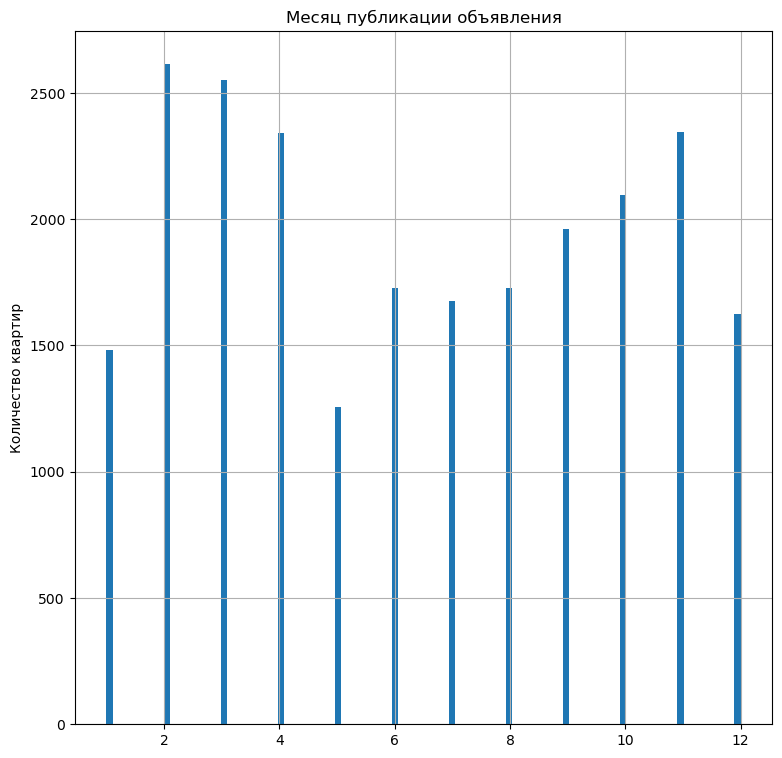

In [63]:
#построим гистограмму для столбца exposition_month
data['exposition_month'].hist(figsize=(9, 9), grid = True, bins = 100)
plt.title('Месяц публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

Согласно гистограмме, чаще всего объявления о продаже квартир публиковались с февраля по апрель и в ноябре. Реже всего объявления публиковались в  январе и мае, вероятно, из-за большого количества праздничных дней.

**Вывод:** На данном этапе выявили самый распространенный вариант квартир:
- квартиры с общей площадью 45 м²;
- квартиры с жилой площадью 17-18 м²;
- квартиры с площадью кухни 6-6,5 м²;
- квартиры стоимостью 3-5 млн;
- однокомнатные и двухкомнатные квартиры;
- квартиры с высотой потолков 2,7 м;
- квартиры, находящиеся с 1 по 4 этаж;
- квартиры, находящиеся между первым и последним этажами;
- объекты недвижимости этажностью от 4 до 6;
- квартиры, от которых расстояние до центра города от 11000 до 17000 м;
- квартиры, от которых расстояние до ближайшего аэропорта от 13000 до 30000 м;
- квартиры, от которых расстояние до ближайшего парка от 350 до 580 м;
- объявления о продаже квартир публиковались в будние дни недели;
- объявления о продаже квартир публиковались с февраля по апрель и в ноябре.


**4. 2 Изучим, как быстро продавались квартиры**

In [64]:
#посчитаем среднее значение в столбце days_exposition
print(data['days_exposition'].mean())
#посчитаем медианное значение в столбце days_exposition
print(data['days_exposition'].median())

180.9046796327377
95.0


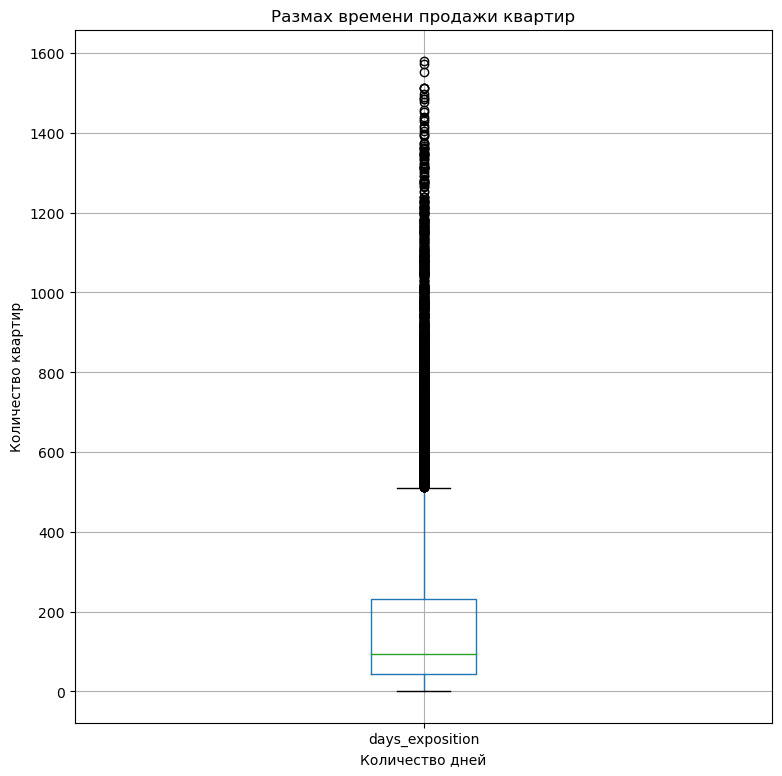

In [65]:
#построим диаграмму размаха для столбца days_exposition
data.boxplot(column='days_exposition', figsize=(9, 9))
plt.title('Размах времени продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')          
plt.show()

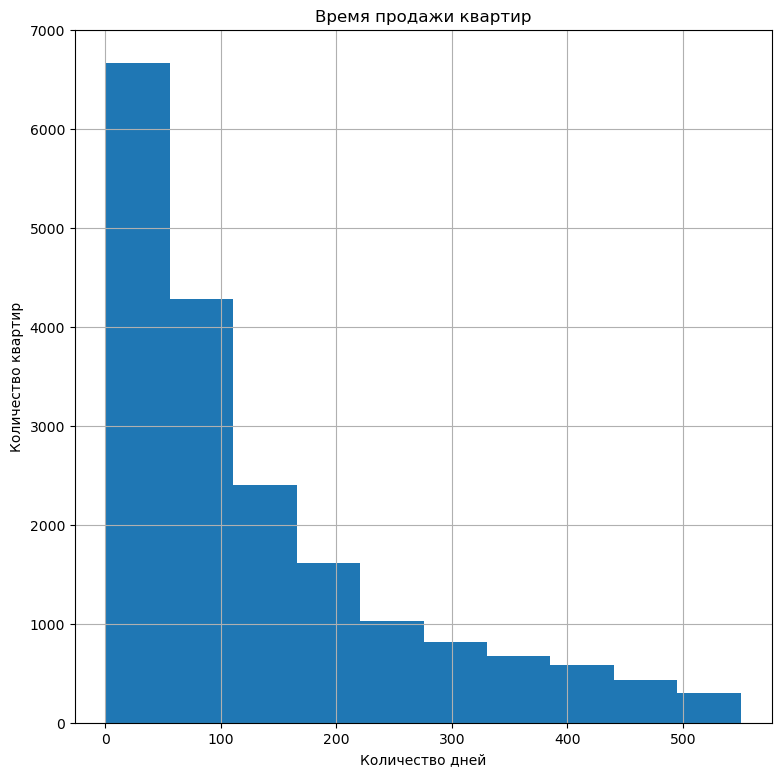

In [66]:
#построим гистограмму для столбца days_exposition, исключив выбросы
(
data.query('0 < days_exposition <= 550')
    .hist(column = 'days_exposition',  figsize=(9, 9), grid = True)
)
plt.title('Время продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Построив диаграмму размаха, определили, что время продажи квартир более 550 дней - это выбросы. Среднее значение в столбце days_exposition - 180 дней, а медиана - 95 дней. Построили гистограмму, исключив выбросы. На графике видно, что чаще всего квартиры продавались от 1 до 50 дней, примерно в течение двух месяцев. Долгими продажами можем охарактеризовать квартиры, которые продавались более 320 дней, т.е., почти год.

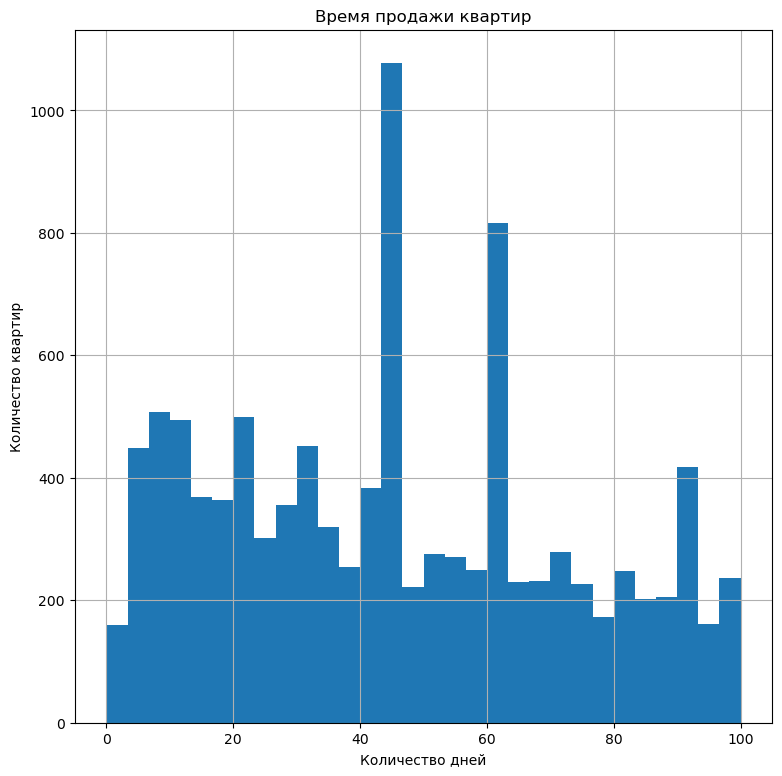

In [67]:
#построим гистограмму для столбца days_exposition, исключив выбросы и сократив диапазон по дням
(
data.query('0 < days_exposition <= 550')
    .hist(column = 'days_exposition', range=(0,100), figsize=(9, 9), grid = True, bins = 30)
)
plt.title('Время продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

При изменении диапазона дней до 100, мы можем наблюдать пики продаж через 45, 60 и 90 дней. Данные показатели не сильно приближены к медианному и среднему значениям, следовательно, данные значения могут быть выбросами. 

Ознакомившись с условиями размещения объвлений на сервисе Яндекс.Недвижимость, было выявлено, что в зависимости от стоимости объекта недвижимости, размещение объявлений автоматически прекращается на 45, 60 и 90 день. Нет оснований утверждать, что квартиры действительно были проданы в эти дни. Вероятно, просто было прекращено размещение объявлений. 

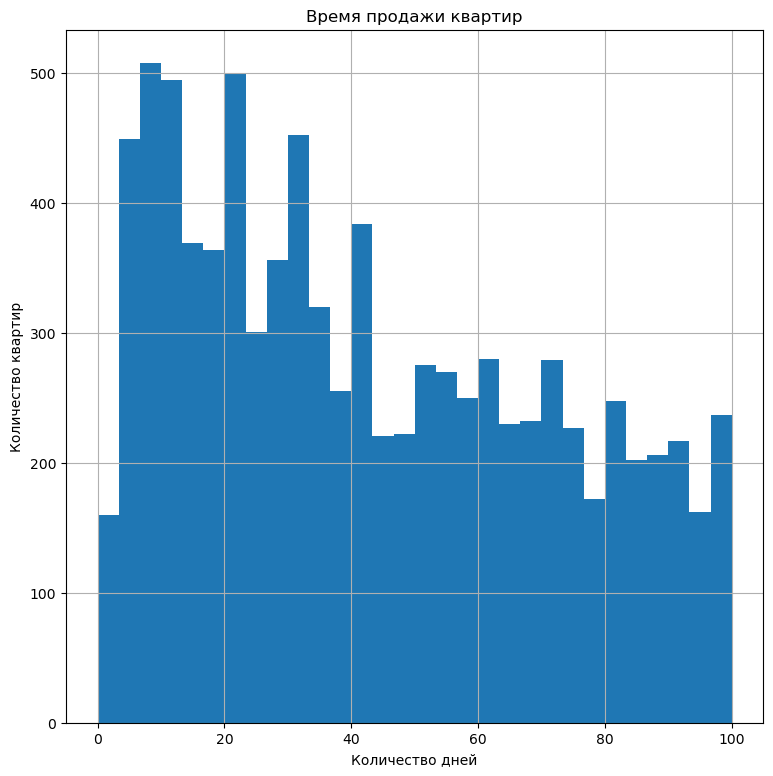

In [68]:
#построим гистограмму, устранив в данных выбросы
(
data.query('0 < days_exposition < 45 or 46 <= days_exposition < 60 or 60 < days_exposition < 90 or 91 <= days_exposition <= 550')
    .hist(column = 'days_exposition', range=(0, 100), figsize=(9, 9), grid = True, bins = 30)
)
plt.title('Время продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Построили новую гистограмму, исключив выбросы (значения 45, 60 и 90). На графике можем наблюдать резковатый спад до значения 45 дней. Затем график старается выровниться. На основании полученных данных будем считать быстрыми продажами сделки, совершенные до 45 дней, долгие продажи - выше 45 дней.

**4. 3 Рассмотрим факторы, которые больше всего влияют на общую (полную) стоимость объекта**

In [69]:
#создадим таблицу с необходимыми столбцами
data_needed = pd.DataFrame(data, columns = ['last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'floor_type',
    'exposition_weekday',
    'exposition_month',
    'exposition_year'])

#создадим матрицу корреляции
data_needed_matrix = data_needed.corr(numeric_only=True)

#выведем матрицу на экран
data_needed_matrix.style.background_gradient(axis=None)  

,last_price,total_area,living_area,kitchen_area,rooms,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.643551,0.580193,0.505594,0.359512,0.002131,0.000613,-0.043703
total_area,0.643551,1.000000,0.944480,0.651484,0.756728,-0.006537,0.004112,-0.080882
living_area,0.580193,0.944480,1.000000,0.488385,0.825238,-0.006597,-0.000582,-0.073018
kitchen_area,0.505594,0.651484,0.488385,1.000000,0.313908,-0.004387,0.002985,-0.060919
rooms,0.359512,0.756728,0.825238,0.313908,1.000000,-0.007333,-0.003640,-0.054731
exposition_weekday,0.002131,-0.006537,-0.006597,-0.004387,-0.007333,1.000000,0.012080,-0.002907
exposition_month,0.000613,0.004112,-0.000582,0.002985,-0.003640,0.012080,1.000000,-0.271765
exposition_year,-0.043703,-0.080882,-0.073018,-0.060919,-0.054731,-0.002907,-0.271765,1.000000


In [70]:
#отсортируем значения в столбце last_price по убыванию для наглядности 
data_needed_matrix['last_price'].sort_values(ascending = False)

last_price            1.000000
total_area            0.643551
living_area           0.580193
kitchen_area          0.505594
rooms                 0.359512
exposition_weekday    0.002131
exposition_month      0.000613
exposition_year      -0.043703
Name: last_price, dtype: float64

Построив матрицу корреляции, можно сделать вывод, что больше всего на стоимость квартиры влияют общая площадь, жилая площадь и площадь кухни, коэффициенты корреляции составляют 0.64, 0.58 и 0.51 соответственно. В данных случаях коэффициенты корреляции положительные, значит, зависимость прямопропорциональна: Чем больше общая площадь квартиры, жилая площадь и площадь кухни, тем выше стоимость объекта недвижимости. Более слабую зависимость можно отметить между стоимостью квартиры и количеством комнат, зависимость также прямопропорциональна: чем больше комнат в квартире, тем выше ее стоимость. Зависимость между стоимостью объекта и датой размещения (день недели, месяц, год) отсутствует.

Потроим график зависимости по каждому параметру.

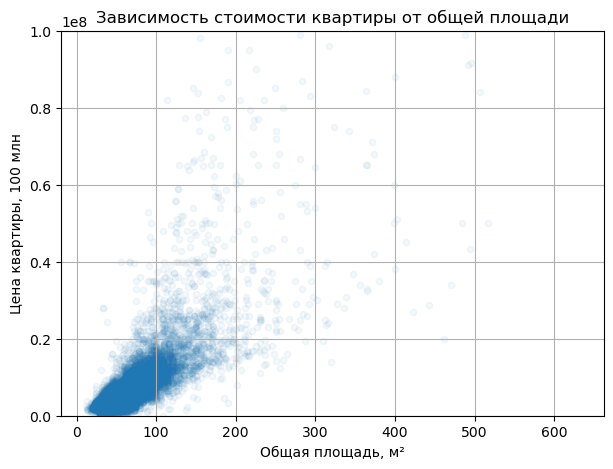

In [71]:
#построим график зависимости цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив график, убеждаемся что зависимость между стоимостью квартиры и общей площадью прямопропорциональна: чем больше общая площадь квартиры, тем выше ее стоимость. Наибольшее количество квартир стоимостью до 18 млн и общей площадью до 125 м².

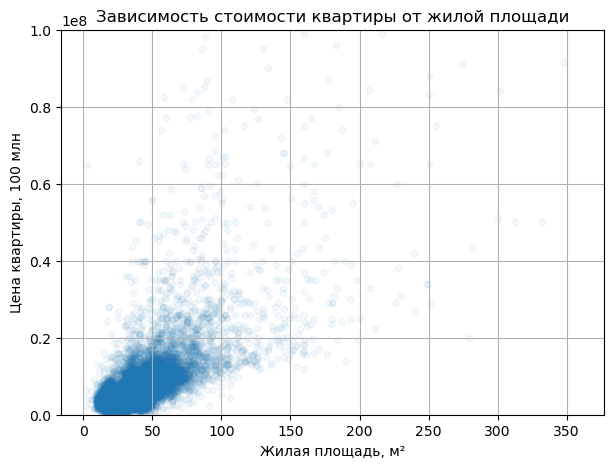

In [72]:
#построим график зависимости цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив график, убеждаемся что зависимость между стоимостью квартиры и жилой площадью прямопропорциональна: чем больше жилая площадь квартиры, тем выше ее стоимость. Наибольшее количество квартир стоимостью до 17 млн и жилой площадью до 75 м².

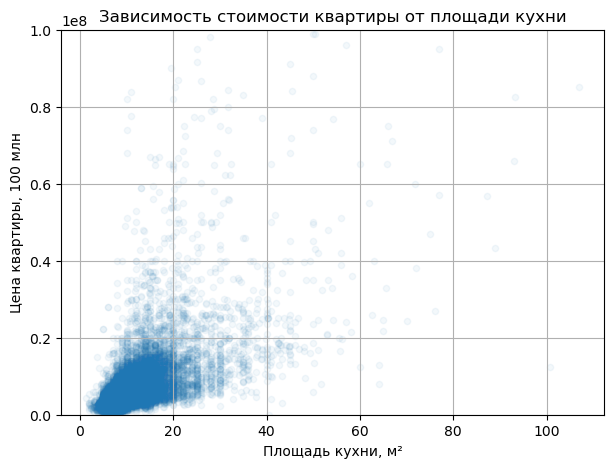

In [73]:
#построим график зависимости цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив график, убеждаемся что зависимость между стоимостью квартиры и площадью кухни прямопропорциональна: чем больше площадь кухни квартиры, тем выше ее стоимость. Наибольшее количество квартир стоимостью до 17 млн и площадью кухни до 20 м².

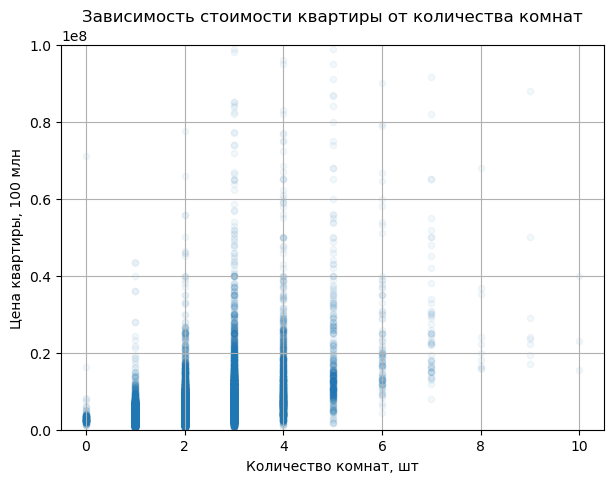

In [74]:
#построим график зависимости цены от количества комнат
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив график, можно увидеть небольшую положительную зависимость между стоимостью квартиры и количеством комнат и сделать вывод: чем больше комнат в квартире, тем выше ее стоимость. Наибольшее количество квартир стоимостью до 25 млн и количеством комнат до 6.

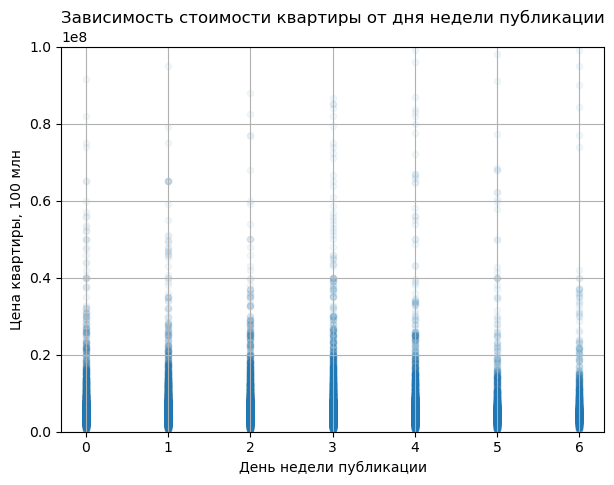

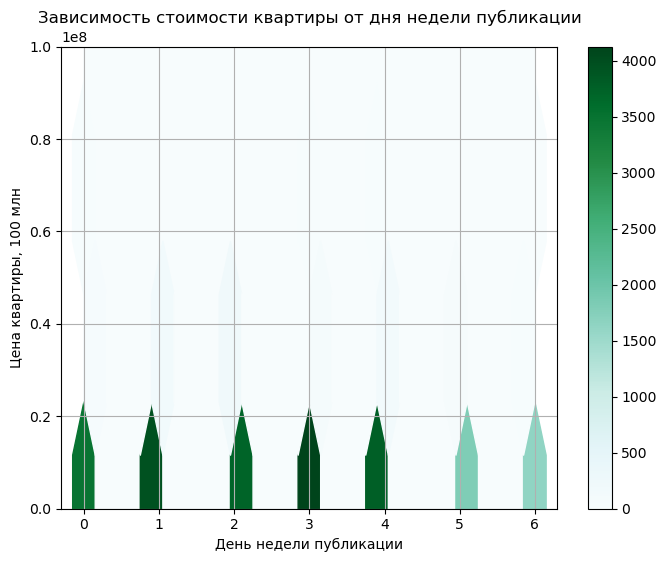

In [75]:
#построим графики зависимости цены от дня недели публикации
data.plot(x='exposition_weekday', y='last_price', kind='scatter', grid=True, figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от дня недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

data.plot(x='exposition_weekday', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.title('Зависимость стоимости квартиры от дня недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив графики, убеждаемся что зависимость между стоимостью квартиры и днем недели публикации отсутствует. Наибольшее количество квартир стоимостью до 20 млн, опубликованных в будние дни недели.

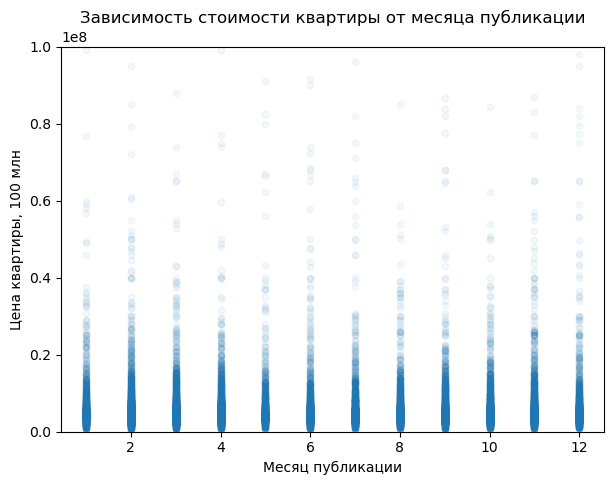

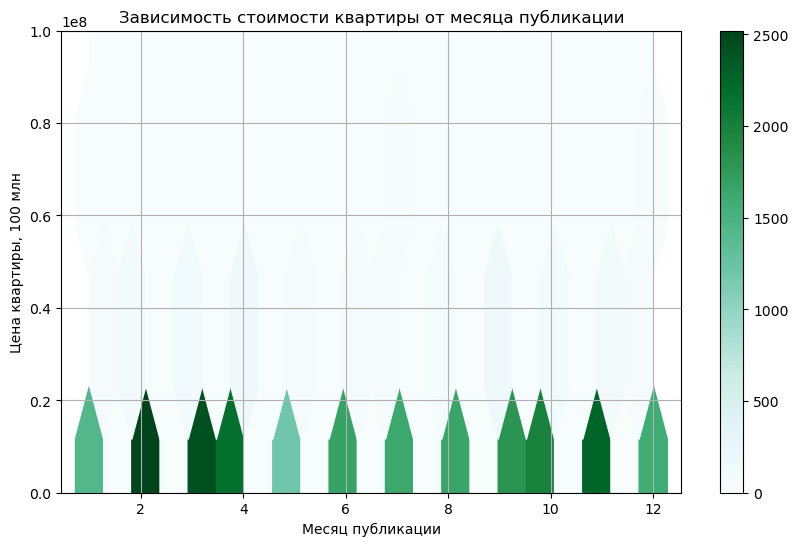

In [76]:
#построим графики зависимости цены от месяца публикации
data.plot(x='exposition_month', y='last_price', kind='scatter', figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

data.plot(x='exposition_month', y='last_price', kind='hexbin', gridsize=20, figsize=(10, 6), sharex=False, grid=True) 
plt.title('Зависимость стоимости квартиры от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив графики, убеждаемся что зависимость между стоимостью квартиры и месяцем публикации отсутствует. Наибольшее количество квартир стоимостью до 20 млн, опубликованных с февраля по апрель и в ноябре.

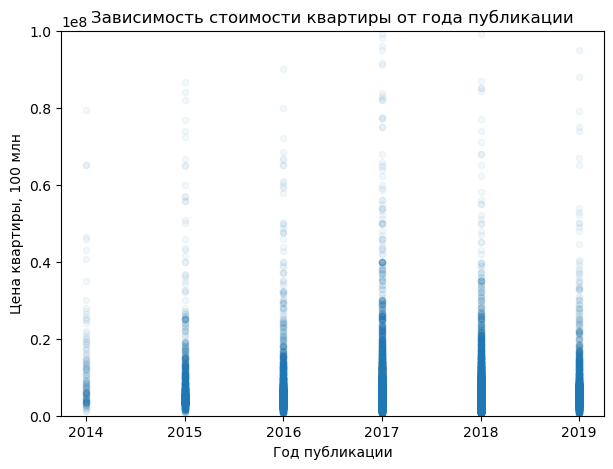

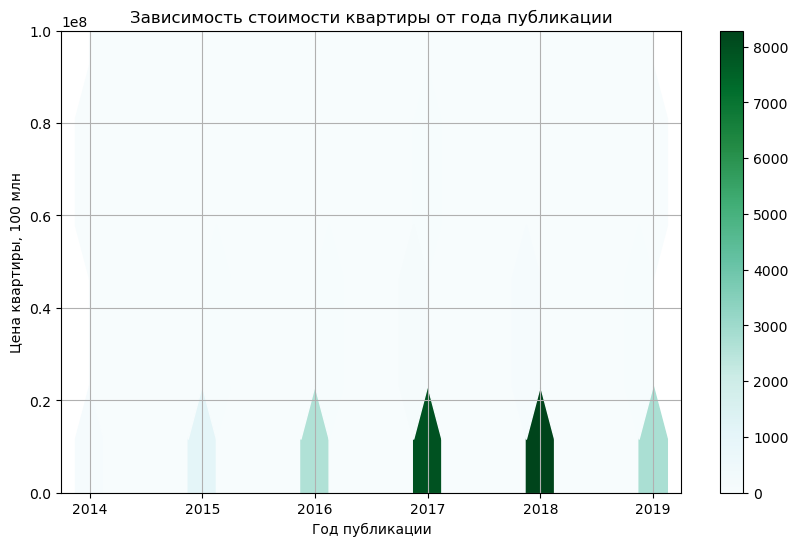

In [77]:
#построим графики зависимости цены от года публикации
data.plot(x='exposition_year', y='last_price', kind='scatter', figsize=(7, 5), alpha=0.05)
plt.title('Зависимость стоимости квартиры от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

data.plot(x='exposition_year', y='last_price', kind='hexbin', gridsize=20, figsize=(10, 6), sharex=False, grid=True) 
plt.title('Зависимость стоимости квартиры от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена квартиры, 100 млн')
plt.ylim(0, 100000000)
plt.show()

Построив графики, убеждаемся что зависимость между стоимостью квартиры и годом публикации отсутствует. Наибольшее количество квартир стоимостью до 20 млн, опубликованных в 2017 и 2018 годах.

In [78]:
#построим сводную таблицу
floor_type_pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

#переименуем столбец
floor_type_pivot.columns = ['median']

#проверим
floor_type_pivot

,median
floor_type,
другой,4850000.0
первый,3900000.0
последний,4350000.0


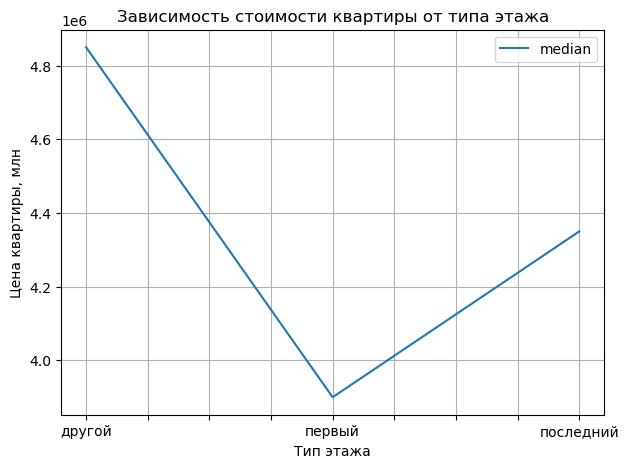

In [79]:
#построим график зависимости цены от типа этажа
floor_type_pivot.plot(y='median', grid=True, figsize=(7, 5))
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры, млн')
plt.show()

Построили сводную таблицу с медианными значениями стоимости по каждому типу этажа. Построив гистограмму, можно сделать вывод, что самые дешевые квартиры находятся на первом этаже. Стоимость квартир, расположенных между первым и последним этажами, наиболее высокая.

**Вывод:** проанализировав графики, можно утверждать, что на общую стоимость объекта недвижимости влияют:
- общая площадь квартиры;
- жилая площадь квартиры;
- площадь кухни квартиры;
- количество комнат в квартире.

Также заметили, что самые дорогие квартиры расположены между первым и последним этажами.

**4. 4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [80]:
#создадим новую таблицу
top_10_locations = data['locality_name'].value_counts().head(10)

#создадим сводную таблицу
top_10_locations_pivot = data.query('locality_name in @top_10_locations.index').pivot_table(index = 'locality_name', values = 'price_per_area', aggfunc = 'mean')

#отсортируем данные по столбцу price_per_area по убыванию
top_10_locations_pivot.sort_values(by = 'price_per_area', ascending = False).round(0)

,price_per_area
locality_name,
Санкт-Петербург,114825.0
Пушкин,103126.0
деревня Кудрово,92474.0
поселок Парголово,90176.0
поселок Мурино,85630.0
поселок Шушары,78551.0
Колпино,75425.0
Гатчина,68746.0
Всеволожск,68654.0


В сводной таблице видно, что самая высокая средняя цена за 1 м² в квартирах в Санкт-Петербурге (114825), это логично, ведь Санкт-Петербург - культурная столица России. А наименьшая средняя цена в данной таблице за 1 м² в квартирах Выборга (58142). 

**4. 5 Определим зависимость стоимости квартир от расстояния до центра города**

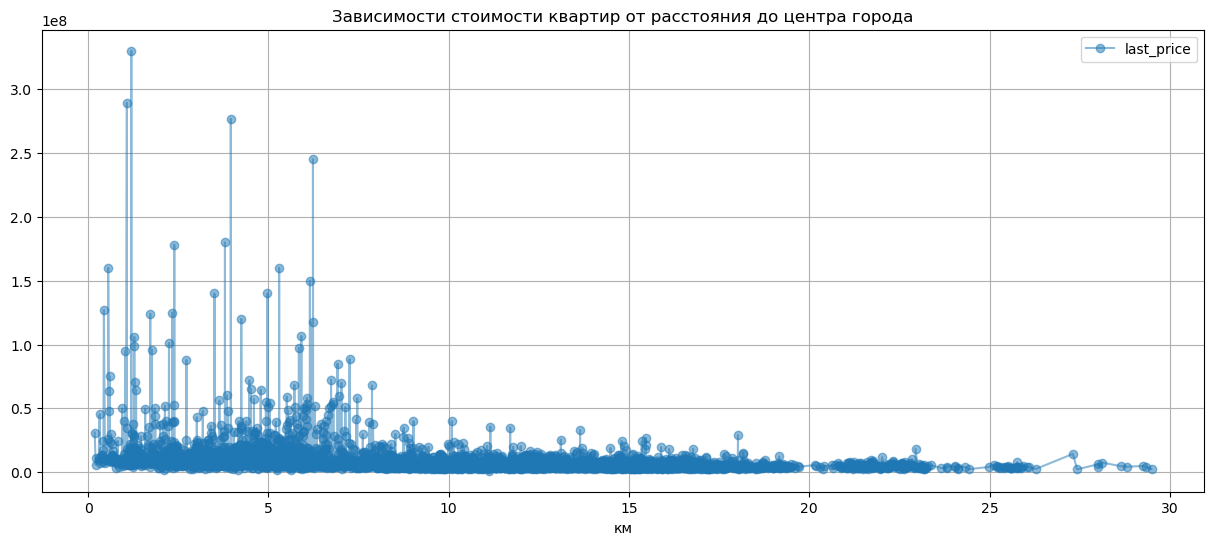

In [81]:
#построим график зависимости стоимости квартир от расстояния до центра города
(
data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_distance_km', values='last_price')
    .plot(marker='o', grid=True, figsize=(15, 6), alpha=0.5)
)
plt.title('Зависимости стоимости квартир от расстояния до центра города')
plt.xlabel('км')
plt.show()

Проанализировав график, можно сделать вывод, что самая дорогая недвижимость расположена в 1 км от центра города. До 8 км наблюдаем резкий спад стоимости. Плавное понижение наблюдается примерно при расстоянии до центра города от 8 км до 27 км. Вероятно, за 27 км от центра города расположены квартиры в элитном районе.

## Общий вывод

Для получения корректных результатов исследования исходная таблица была успешно преобразована на этапе предобработки.

В ходе исследования был выявлен самый распространенный вариант квартир в объявлениях:
На данном этапе выявили самый распространенный вариант квартир:
- квартиры с общей площадью 45 м²,  жилой площадью 17-18 м², площадью кухни 6-6,5 м²;
- квартиры стоимостью 3-5 млн;
- однокомнатные и двухкомнатные квартиры;
- квартиры с высотой потолков 2,7 м;
- квартиры, находящиеся с 1 по 4 этаж, находящиеся между первым и последним этажами, объекты недвижимости этажностью от 4 до 6; 
- квартиры с расстоянием до центра города от 11000 до 17000 м, до ближайшего аэропорта от 13000 до 30000 м, до ближайшего парка от 350 до 580 м;
- объявления о продаже квартир публиковались в будние дни недели, с февраля по апрель и в ноябре.

Для корректного анализа ознакомились с условиями размещения объвлений на сервисе Яндекс.Недвижимость. В результате было выявлено, что в зависимости от стоимости объекта недвижимости, размещение объявлений автоматически прекращается на 45, 60 и 90 день. Нет оснований утверждать, что квартиры действительно были проданы в эти дни. Вероятно, просто было прекращено размещение объявлений. Значения 45, 60 и 90 посчитали выбросами и построили новую гистограмму. На основании полученных данных быстрой продажей квартиры можем охарактеризовать сделку, соврешенную за 45 дней. Долгие продажи - дольше 45 дней.

На общую стоимость квартир влияют:
- общая площадь квартиры;
- жилая площадь квартиры;
- площадь кухни квартиры;
- количество комнат в квартире.

Также было выявлено, что самые дорогие квартиры расположены между первым и последним этажами.

Стоит отметить, что самая высокая средняя цена за 1 м² в квартирах Санкт-Петербурга (114825), а наименьшая средняя цена за 1 м² в квартирах Выборга (58142). На территории Санкт-Петербурга самыми дорогостоящими объектами считаются квартиры, расположенные в пределах 1 км от центра города.